# Introduction and Goal

## Introduction
Identifying the composer of a musical piece while seemingly straightforward, presents a complex challenge, particularly for individuals less familiar with the idiosyncrasies of musical styles.Each composer has a distinct style that is often recognizable to thos that might have studied their works. This project endeavors to harness advanced deep learning techniques to construct a predictive model that can accurately identify the composer of a musical score.

## Project Goal
The primary objective of this project is to leverage deep learning techniques to develop a model capable of accurately predicting the composer of a given musical score. By using Long Short-Term Memory and Convolutional Neural Network architectures, this project aims to analyze MIDI files and recognize patterns corresponding to different composers. These models will be able to capture and learn the distinctive musical patterns and structural elements characteristic of each composer's work. Our analysis will focus on a selected group of composers.

## Dataset
The dataset for this project comprises about 1200 MIDI files, spanning works from 4 composers. For the purposes of this study, we will narrow our our analysis to compositions by Bach, Beethoven, Chopin, and Mozart. This selective approach not only facilitates a more manageable dataset but also ensures that the training process is highly targeted, enhancing the predictive accuracy of our model and alinges with our proejct goals

# Gather data

## Overview
The dataset for this project consists of MIDI files, which are digital representations of musical scores. These files are organized within a compressed zip archive and categorized by composer and, in some instances, by specific musical styles or periods.

## Objective
The aim of this part of the project is to extract relevant MIDI files for our target composers: Bach, Beethoven, Chopin, and Mozart. These composers are foundational to the study of classical music and their compositions offer a diverse array of styles and complexities which are ideal for training our deep learning models.

## Method
Our code below will filter files based on the composer directories and ensure that only MIDI files are extracted. This step is crucial for organizing our data and preparing it for the next stages of pre-processing and analysis.


In [2]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_path = '/content/archive (6).zip'  # Adjust this path to where your zip file is stored (Started this proejc on colabos its in /content/ for me)
extract_to = '/content/extracted_folder'

# Create the directory if it does not exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Function to extract MIDI files for specific composers
def extract_midi_files(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zfile:
        # List all file names in the zip
        file_names = zfile.namelist()
        # Define the composers and their subdirectories we are interested in
        composers = ['Bach/', 'Beethoven/', 'Chopin/', 'Mozart/']
        # Extract relevant files
        for file_name in file_names:
            if any(composer in file_name for composer in composers):
                # Check if the path includes '.mid' extension
                if file_name.endswith('.mid'):
                    zfile.extract(file_name, extract_to)
                    print(f"Extracted: {file_name}")

# Call the function
extract_midi_files(zip_path, extract_to)


BadZipFile: File is not a zip file

# Data Organization

## Overview
The extracted MIDI files are organized into folders by composer, with some composers' folders containing further nested directories based on specific works or collections. This hierarchical structure can complicate data handling during the pre-processing and training phases.


To streamline our workflow, we will reorganize the MIDI files so that all files from each composer are consolidated into a single directory per composer. This reorganization will help in simplifying the file access during the feature extraction and model training stages.


In [ ]:
import shutil
import os

# Base directory where MIDI files are currently stored
base_dir = '/content/extracted_folder/midiclassics_subset'

# Target directory for flattened MIDI files
target_dir = '/content/flat_midi_files'

# Create the target directory if it does not exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

def flatten_files(base_dir, target_dir):
    # Loop through each composer's directory and subdirectories
    for composer in os.listdir(base_dir):
        composer_path = os.path.join(base_dir, composer)
        if os.path.isdir(composer_path):
            # Prepare the target directory for the composer
            composer_target_dir = os.path.join(target_dir, composer)
            if not os.path.exists(composer_target_dir):
                os.makedirs(composer_target_dir)
            # Recursively move all MIDI files
            for root, dirs, files in os.walk(composer_path):
                for file in files:
                    if file.endswith('.mid'):
                        source_file_path = os.path.join(root, file)
                        target_file_path = os.path.join(composer_target_dir, file)
                        shutil.move(source_file_path, target_file_path)
                        print(f"Moved {file} to {target_file_path}")

# Call the function
flatten_files(base_dir, target_dir)


Moved K361 Serenade n10 3mov.mid to /content/flat_midi_files/Mozart/K361 Serenade n10 3mov.mid
Moved K136 Divertimento 1mov.mid to /content/flat_midi_files/Mozart/K136 Divertimento 1mov.mid
Moved K317 Coronation Mass 4mov.mid to /content/flat_midi_files/Mozart/K317 Coronation Mass 4mov.mid
Moved K314 Flute Concerto n2 2mov.mid to /content/flat_midi_files/Mozart/K314 Flute Concerto n2 2mov.mid
Moved Rondo in C.mid to /content/flat_midi_files/Mozart/Rondo in C.mid
Moved Sonatina n3 2mov.mid to /content/flat_midi_files/Mozart/Sonatina n3 2mov.mid
Moved K626 Requiem 02 rextremendae.mid to /content/flat_midi_files/Mozart/K626 Requiem 02 rextremendae.mid
Moved K620 Overture The Magic Flute.mid to /content/flat_midi_files/Mozart/K620 Overture The Magic Flute.mid
Moved K626 Requiem 05 Recordare.mid to /content/flat_midi_files/Mozart/K626 Requiem 05 Recordare.mid
Moved Contradance n3.mid to /content/flat_midi_files/Mozart/Contradance n3.mid
Moved K191 Bassoon Concerto 1mov.mid to /content/flat_

# Preliminary Data Analysis of MIDI Files

Before diving into bulk feature extraction, we think it might be prudent to perform an initial analysis on a sample MIDI file from each composer. This will help us understand the structure and content of the MIDI files, ensuring that our feature extraction process is both relevant and comprehensive.

The aim of this step is to:
- Inspect the content of a representative MIDI file from each composer.
- Identify the types of musical information available, such as notes, tempo, and instruments.
- Determine the variability and consistency across different files, which could affect our feature extraction strategy.

### analysis approach
We will select one MIDI file from each composer, load it, and display the details about notes, tempo, and any other relevant information. This exploration will guide our decisions on what features to extract for model training.


In [ ]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=c723655910a9720d174b3093c279128f35c46f9aaa8c6481de787c85c5517bbe
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
import pretty_midi

# Path to the sample MIDI files from each composer
sample_files = {
    'Bach': '/content/flat_midi_files/Bach/003706b_.mid',
    'Beethoven': '/content/flat_midi_files/Beethoven/Fur Elise.mid',
    'Chopin': '/content/flat_midi_files/Chopin/19 Polish Songs, for Solo Voice and Piano accomplements, No.10.mid',
    'Mozart': '/content/flat_midi_files/Mozart/Symphony n22 K162 1mov.mid'
}

# Function to print details of a MIDI file
def print_midi_details(midi_path):
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    print(f"Analyzing {midi_path.split('/')[-1]}:")
    print(f"Number of instruments: {len(midi_data.instruments)}")
    if midi_data.instruments:
        instrument = midi_data.instruments[0]
        print(f"Instrument name: {instrument.name}")
        print(f"Number of notes: {len(instrument.notes)}")
        first_note = instrument.notes[0]
        print(f"First note pitch: {first_note.pitch}, start: {first_note.start}, end: {first_note.end}")
    print(f"Estimated tempo: {midi_data.estimate_tempo()}")
    print("-" * 50)

# Analyze sample MIDI files from each composer
for composer, file_path in sample_files.items():
    print_midi_details(file_path)


Analyzing 003706b_.mid:
Number of instruments: 4
Instrument name: Instrument 1
Number of notes: 70
First note pitch: 69, start: 1.9565190000000001, end: 2.608692
Estimated tempo: 184.00025760036064
--------------------------------------------------
Analyzing Fur Elise.mid:
Number of instruments: 4
Instrument name: Piano RH
Number of notes: 611
First note pitch: 76, start: 0.03333333333333333, end: 0.225
Estimated tempo: 183.00530940491342
--------------------------------------------------
Analyzing 19 Polish Songs, for Solo Voice and Piano accomplements, No.10.mid:
Number of instruments: 2
Instrument name: Piano
Number of notes: 1565
First note pitch: 70, start: 0.0, end: 0.24990780000000004
Estimated tempo: 187.90482286552216
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Analyzing Symphony n22 K162 1mov.mid:
Number of instruments: 7
Instrument name: Oboes
Number of notes: 602
First note pitch: 72, start: 0.0, end: 3.6
Estimated tempo: 162.50000000000023
--------------------------------------------------


We can see interesting details about the musical content and structure across different composers. Let's summarize the findings and discuss how they can influence our feature extraction strategy:

- The MIDI files vary in the number of instruments used, ranging from 2 to 7. This variability indicates that instrumentation will be an important feature, especially if certain composers consistently use specific instrumentations in their compositions.

- Note Details: The number of notes per file varies significantly, indicating varying complexities or lengths of musical pieces.The start and end times of notes provide temporal information about note durations, which is crucial for understanding rhythm and pacing.

- Tempo: Estimated tempos are relatively close across different files, suggesting a potential commonality in the pacing of pieces across different composers. However, slight variations in tempo could still be significant.

### Given these we can try and aim to extract some of these core featuers;

**Instrumentation:** Identifying which instruments are played could help differentiate composers, especially if certain styles or periods favor specific instrumentations.

***Note Attributes-***

**Pitch:** Different composers might favor certain ranges or sequences of pitches.

**Duratio**n: The length of notes, calculated from start and end times, could reflect stylistic differences in composition.

***Temporal Features-***

**Intervals between Notes:** Time gaps between consecutive notes might offer insights into rhythmic patterns.

**Overall File Duration:** Total length of the piece, inferred from the last note's end time.

**Tempo:** As an overall characteristic of the piece, even slight variations in tempo could be indicative of different composing styles.


# Data Pre-processing

Based on our anlysis we'll tray and extract basic features first from our subset of musical works. These features include the number of instruments, note pitches, velocities, durations, and metadata such as tempo and time signatures.

**Details:**
- **Pitches, velocities, and durations** are extracted for each note in the MIDI files. These features help in understanding the typical note characteristics of each composer's work.
- **Aggregated statistics** such as average pitch, velocity, and duration along with their ranges provide insights into the musical dynamics and range.
- **First note details** are printed for a glimpse into the starting musical elements of the compositions.
- **Tempo and time signature** are also extracted, which are crucial for understanding the rhythmic structure and speed of the music.



In [ ]:
import pretty_midi
import os
import numpy as np

# Path to the sample MIDI files from each composer
sample_files = {
    'Bach': '/content/flat_midi_files/Bach/003706b_.mid',
    'Beethoven': '/content/flat_midi_files/Beethoven/Fur Elise.mid',
    'Chopin': '/content/flat_midi_files/Chopin/19 Polish Songs, for Solo Voice and Piano accomplements, No.10.mid',
    'Mozart': '/content/flat_midi_files/Mozart/Symphony n22 K162 1mov.mid'
}

# Function to print detailed features of a MIDI file
def print_midi_details(midi_path):
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    print(f"Analyzing {os.path.basename(midi_path)}:")
    print(f"Number of instruments: {len(midi_data.instruments)}")

    all_pitches = []
    all_velocities = []
    all_durations = []

    if midi_data.instruments:
        for instrument in midi_data.instruments:
            print(f"Instrument name: {pretty_midi.program_to_instrument_name(instrument.program)}")
            print(f"Number of notes: {len(instrument.notes)}")
            for note in instrument.notes:
                all_pitches.append(note.pitch)
                all_velocities.append(note.velocity)
                all_durations.append(note.end - note.start)
                # Print details for the first note as an example
                if note == instrument.notes[0]:
                    print(f"First note pitch: {note.pitch}, velocity: {note.velocity}, start: {note.start}, end: {note.end}, duration: {note.end - note.start}")

    # Calculate aggregated features
    if all_pitches:
        avg_pitch = np.mean(all_pitches)
        avg_velocity = np.mean(all_velocities)
        avg_duration = np.mean(all_durations)
        max_pitch = np.max(all_pitches)
        min_pitch = np.min(all_pitches)
        std_duration = np.std(all_durations)

        print(f"Average pitch: {avg_pitch}")
        print(f"Average velocity: {avg_velocity}")
        print(f"Average duration: {avg_duration}")
        print(f"Max pitch: {max_pitch}")
        print(f"Min pitch: {min_pitch}")
        print(f"Standard deviation of durations: {std_duration}")

    print(f"Estimated tempo: {midi_data.estimate_tempo()}")
    if midi_data.time_signature_changes:
        time_sig = midi_data.time_signature_changes[0]
        print(f"Time signature: {time_sig.numerator}/{time_sig.denominator} at {time_sig.time}")
    print("-" * 50)

# Analyze sample MIDI files from each composer
for composer, file_path in sample_files.items():
    print_midi_details(file_path)


Analyzing 003706b_.mid:
Number of instruments: 4
Instrument name: Acoustic Grand Piano
Number of notes: 70
First note pitch: 69, velocity: 96, start: 1.9565190000000001, end: 2.608692, duration: 0.6521729999999999
Instrument name: Acoustic Grand Piano
Number of notes: 72
First note pitch: 61, velocity: 96, start: 1.9565190000000001, end: 2.2826055, duration: 0.3260864999999997
Instrument name: Acoustic Grand Piano
Number of notes: 86
First note pitch: 57, velocity: 96, start: 1.9565190000000001, end: 2.608692, duration: 0.6521729999999999
Instrument name: Acoustic Grand Piano
Number of notes: 76
First note pitch: 54, velocity: 96, start: 1.9565190000000001, end: 2.608692, duration: 0.6521729999999999
Average pitch: 60.94407894736842
Average velocity: 96.0
Average duration: 0.5921044342105264
Max pitch: 76
Min pitch: 45
Standard deviation of durations: 0.3418920409947544
Estimated tempo: 184.00025760036064
Time signature: 4/4 at 0.0
--------------------------------------------------
Ana

### Initial Feature Extraction Results

We have successfully extracted several key musical features from sample MIDI files of four composers. Here some basic observations about the number of instruments, detailed note characteristics, and aggregated statistics such as average pitch, velocity, and duration.

**Key Observations:**
1. **Number of Instruments** and **Instrument Types**: This helps identify the complexity and the orchestration style used by each composer.
2. **Note Characteristics**:
   - **Pitch**: Indicates the highness or lowness of the musical notes used.
   - **Velocity**: Relates to the loudness of each note, which can suggest dynamics.
   - **Duration**: Refers to how long each note is held, impacting the rhythmic feel.
3. **Aggregated Statistics**:
   - **Average Pitch, Velocity, and Duration**: Provide a macro view of the musical style, helping distinguish between the composers' usage of scales, dynamics, and rhythm.
   - **Range of Pitches** (Max and Min): Shows the tonal range explored in the compositions.
   - **Standard Deviation of Durations**: Offers insights into rhythmic variability.
4. **Tempo and Time Signature**:
   - The **Estimated Tempo** and **Time Signature** are crucial for understanding the rhythmic structure and pace of each piece.

These features are fundamental for the initial classification and understanding of musical styles attributed to each composer.


### Exploring Advanced Musical Features for MIDI Analysis

In our initial examination, we've identified basic musical elements like pitch, velocity, and duration. To deepen our understanding and enhance our model's ability to classify compositions by composer accurately, we'll now consider extracting more nuanced and complex features. These features can capture the intricacies of musical expression and composition styles that distinguish one composer from another. Based on our snlyssy and some musical theory we've identifed the following;

#### 1. **Polyphony**: This measures the number of simultaneous notes played, reflecting the texture and complexity of the composition. High polyphony might indicate a dense, complex piece typically seen in orchestral or polyphonic keyboard works.

**Importance**: This feature is crucial as it can help differentiate composers who favor complex harmonies and textures from those who prefer simpler, more melodic lines.

#### 2. **Rhythmic Patterns:** involve the timing intervals between note onsets, providing insight into the rhythmic structure and tempo variations within a piece.
**Importance**: Extracting average and standard deviation of these intervals can reveal a composer's rhythmic signature, such as the use of syncopation, regularity, or complexity in timing.

#### 3. **Chord Usage**: Analyzing the chords used in compositions can tell us about harmonic style, key preferences, and complexity. Unique chords and their frequencies can significantly reveal stylistic nuances.
**Importance**: Different composers have distinct harmonic languages. By identifying the chords, we can potentially link pieces to their composers based on harmonic choices.

#### 4. **Melodic Contours**: Melodic contour refers to the shape of the melody line, tracked through the sequence of note pitches. Analyzing contours can help in understanding the melodic direction and intervals commonly used by the composer.
**Importance**: Melodic contours can distinguish between composers who may use more linear vs. complex, jumping melodic lines.



The following section shows how we extract thise new features, which are essential for a deeper analysis and more accurate classification of MIDI files based on composer styles. This approach will enable us to capture the unique musical signatures of different composers.


In [ ]:
import pretty_midi
import numpy as np
import os
from music21 import converter, analysis

# Calculate polyphony
def calculate_polyphony(midi_data):
    max_polyphony = []
    for instrument in midi_data.instruments:
        piano_roll = instrument.get_piano_roll(fs=100)
        polyphony = np.max(np.sum(piano_roll > 0, axis=0))
        max_polyphony.append(polyphony)
    return max(max_polyphony)

# Extract rhythmic patterns
def rhythmic_patterns(notes):
    intervals = np.diff([note.start for note in notes])
    return np.mean(intervals), np.std(intervals)

# Analyze MIDI file and extract features
def analyze_midi(file_path):
    midi_data = pretty_midi.PrettyMIDI(file_path)
    print(f"\nAnalyzing {os.path.basename(file_path)}:")
    print(f"Number of instruments: {len(midi_data.instruments)}")

    s = converter.parse(file_path)
    chordified = s.chordify()
    chords = [c.pitches for c in chordified.recurse().getElementsByClass('Chord')]
    unique_chords = set([''.join(p.nameWithOctave for p in chord) for chord in chords])

    for instrument in midi_data.instruments:
        notes = instrument.notes
        if notes:
            avg_rhythm, std_rhythm = rhythmic_patterns(notes)
            print(f"Instrument: {pretty_midi.program_to_instrument_name(instrument.program)}")
            print(f"Average Rhythmic Interval: {avg_rhythm}, Std Dev: {std_rhythm}")

    polyphony = calculate_polyphony(midi_data)
    print(f"Max Polyphony: {polyphony}")
    print(f"Unique Chords: {unique_chords}")
    print(f"Estimated Tempo: {midi_data.estimate_tempo()} BPM")
    if midi_data.time_signature_changes:
        time_sig = midi_data.time_signature_changes[0]
        print(f"Time Signature: {time_sig.numerator}/{time_sig.denominator}")

# Sample MIDI files from each composer
sample_files = {
    'Bach': '/content/flat_midi_files/Bach/003706b_.mid',
    'Beethoven': '/content/flat_midi_files/Beethoven/Fur Elise.mid',
    'Chopin': '/content/flat_midi_files/Chopin/19 Polish Songs, for Solo Voice and Piano accomplements, No.10.mid',
    'Mozart': '/content/flat_midi_files/Mozart/Symphony n22 K162 1mov.mid'
}

# Analyze each sample MIDI file
for composer, file_path in sample_files.items():
    analyze_midi(file_path)



Analyzing 003706b_.mid:
Number of instruments: 4
Instrument: Acoustic Grand Piano
Average Rhythmic Interval: 0.6143658695652173, Std Dev: 0.21166506923142472
Instrument: Acoustic Grand Piano
Average Rhythmic Interval: 0.5970597887323942, Std Dev: 0.27356861783319847
Instrument: Acoustic Grand Piano
Average Rhythmic Interval: 0.4987205294117647, Std Dev: 0.27322782280894325
Instrument: Acoustic Grand Piano
Average Rhythmic Interval: 0.5652166, Std Dev: 0.22169619021588977
Max Polyphony: 1
Unique Chords: {'E3E4B4', 'A2D4A4C#5', 'E-3B3F#4B4', 'B3E4G#4', 'E-3F#3F#4B4', 'D3C#4F#4A4', 'D3B3G#4E5', 'F#3A3D4A4', 'B2B3E4F#4', 'C#3A3A4E5', 'A2C#4E4G#4', 'E3G#3C#4B4', 'C#3C#4E4A4', 'G#3B3E4G#4', 'A2A3E4C#5', 'B2A3E4B4', 'E3A3E4C#5', 'D3G#3B3E4', 'A2E4A4C#5', 'C#3A3C#4A4', 'C#3F#3E4A4', 'A3D4F#4C#5', 'E3A3E4G#4', 'E3B3G#4E5', 'E3G#3E4G#4', 'F#3A3F#4D5', 'B2A3E-4F#4', 'E3G#3B3G#4', 'E3D4B4', 'F#3A3E-4A4', 'B2F#4B4D5', 'E3G#3D4B4', 'C#3A3E4A4', 'A3C#4E4F#4', 'A3C#4E4C#5', 'G#3B3F#4D5', 'D3D4G#4B4',

/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Instrument: Acoustic Grand Piano
Average Rhythmic Interval: 0.25258955085382506, Std Dev: 0.22567334066285308
Instrument: Acoustic Grand Piano
Average Rhythmic Interval: 0.34733400004745624, Std Dev: 0.4735460403939045
Instrument: Acoustic Grand Piano
Average Rhythmic Interval: 0.25258955085382506, Std Dev: 0.2228060604617431
Instrument: Acoustic Grand Piano
Average Rhythmic Interval: 0.34732450877942284, Std Dev: 0.4741010657384549
Max Polyphony: 22
Unique Chords: {'E5F5G5A5', 'D6E6', 'A3C4A4B-4', 'E3E4B4', 'A1A2C4A4', 'A2C5D5', 'B-2G4E-5', 'G2G3D5', 'B4', 'C4E4B4C5', 'D4', 'A1A2C4A4B4', 'A3C4C5', 'D2A2E4C5', 'E2G#2A2', 'A3E-5', 'G3C4E5', 'A2D5F5', 'C7E7', 'E-5', 'A3C4E4G4C5', 'D2A2', 'G3C5D5', 'E3C5', 'B2C3C4E4A4', 'A3C4F5', 'F4G4B4G5', 'F3B-4', 'G2D5E5', 'A2A4C5E5', 'A4', 'E2A4B4', 'E6', 'D4C5', 'E-2A2C4F#4A4', 'B3D5', 'B-2D5F5', 'E3A3E5', 'G4G5', 'C4', 'G3B3D5F5G5', 'G#3B3D5E5F5', 'A3C4E4A5C6', 'D4B4C5', 'E2A2E4C5', 'C5G5', 'E3G#3', 'C3E5', 'E4E-5E5', 'A3C4E4C7D7', 'C3C4E4A4', 'G3B

The results from our more advanced MIDI analysis provides further insghts  for distinguishing between composers based on their unique musical styles.

#### Analysis
**Rhythmic Intervals and Polyphony**: We see significant variations in rhythmic intervals and polyphony across different pieces. For instance, Bach's pieces show lower polyphony, often sticking to single lines of melody, which is typical for Baroque keyboard music. In contrast, Beethoven’s piece, "Fur Elise," shows a higher polyphony rate, indicating more complex textures typical of Romantic music.

**Chord Usage**: The unique chords extracted offer a snapshot of the harmonic richness or simplicity in each composer's works. For example, the diverse chord sets in Beethoven’s and Chopin’s samples reflect their use of extended harmonies and more complex chordal structures compared to Bach.




**Feature Selection:** The variability in rhythmic patterns, polyphony, and chord usage can be directly used as features in our machine learning models to predict the composer of a piece. These features capture fundamental aspects of musical style that are likely to differ from one composer to another.

**Feature Engineering:** Beyond raw data extraction, we can engineer features that might capture more nuanced aspects of music. For example, the transition probabilities between chords, rhythmic motif patterns, or statistical summaries of pitch and duration distributions over entire compositions.

## Full Dataset Pre-Processing and Feature Engineering Strategy

To ensure our model can effectively distinguish between composers, we must carefully select and engineer features that capture the essence and nuances of their music. Here's how we'll approach this using both basic and advanced features:

### Importance of Selected Features

- **Instrumentation and Polyphony**:  Understanding the number and type of instruments used can provide insights into compositional style and texture complexity, which are often unique to each composer.

- **Pitch, Velocity**: Core attributes that define the melodic, harmonic, and rhythmic aspects.

- **Aggregated Statistics**: Summarizes musical dynamics and encompasses averages and variability. Metrics like average pitch and velocity, pitch range, and rhythmic variability give a broad overview of the musical expression within each piece.

- **Chords and Harmony**: Examines the harmonic structure through unique chords, crucial for recognizing compositional styles and polyphony.

- **Rhythmic Patterns**: Analyzes rhythmic intervals and their variations, critical for distinguishing composers.

- **Temporal Features**: Tempo and time signatures set the rhythmic foundation of a piece, essential for understanding its overall feel and pace building to wards teh vibe of the piece tense, cool or suspensfull.

### Enhanced Chord Analysis

- **Chord Frequency Distribution:** Instead of just counting unique chords, we'll also extract the frequency of each chord's occurrence. This could provide deeper insights into the harmonic patterns preferred by different composers. So we'll Count occurrences of each chord and then we normalize these counts to create a frequency distribution. The idea being

- **Chord Progressions**: Analyzing sequences of chords ( also known as chord progressions in music theory) could reveal more about the compositional style than individual chords alone. Chord progressions are fundamental in defining the musical style and can significantly differ across composers. So we'll implnt this by tracking sequences of chords throughout a piece and encode these sequences as categorical features.

- **Chord Duration:** Capturing the average duration of chords and their variance might provide clues about the rhythmic structure and harmonic pacing typical to a composer's style.This will done by calculateing the average and variability of chord durations within each piece.


- **Chord Complexity**: Measuring the complexity of chords (i.e., number of notes per chord, use of dissonance) could also be indicative of a composer's style. More complex chords might suggest a richer harmonic texture, typical of certain classical compositions. To do this we'll meeasure the number of notes in each chord and the occurrence of dissonant intervals.

### Additional Feature Enhancements

- **Dynamic Changes**: Adding dynamic range to capture variations in velocity, providing insights into expressive variations.

- **Melodic Contours**: Adding pitch contour features to capture the melodic shape and flow, helping to distinguish stylistic nuances.

- **Advanced Harmonic Analysis**: Adding functional harmony analysis to understand the harmonic language and progression patterns unique to each composer.

- **Structural Elements**: Adding form analysis to understand the overall architectural layout of a piece, which can be characteristic of a composer's style.


### Feature Engineering Strategy

1. **Basic Note Attributes**:
   - Extract pitches, velocities, and durations to detail the foundational musical elements.
   - Initial note characteristics provide insights into the opening elements of compositions.

2. **Aggregated Metrics**:
   - Statistical measures such as mean, max, min, and standard deviation highlight the musical style.

3. **Instrumentation Features and Polyphony**:
   - Identify the number and type of instruments and calculate maximum polyphony for textural insights.

4. **Harmonic and Rhythmic Analysis**:
   - Perform chord analysis and extract rhythmic intervals for  musical timing and harmony.
   - Use music21 to extract the chords and then analyze their uniqueness and frequency. Look into chord transitions and common patterns if applicable.

5. **Advanced Temporal Analysis**:
   - Determine the tempo and time signature of each piece, which influences the rhythmic and pacing characteristics.

6. **Dynamic Changes**:
   - Measure the dynamic range to capture variations in velocity, providing insights into expressive variations.

7. **Melodic Contours**:
   - Calculate pitch contour features to capture the melodic shape and flow, helping to distinguish stylistic nuances.

8. **Advanced Harmonic Analysis**:
   - Perform functional harmony analysis to understand the harmonic language and progression patterns unique to each composer.

9. **Structural Elements**:
   - Lastly we'll conduct form analysis to understand the overall architectural layout of a piece, which can be characteristic of a composer's style.


With this we hope to capture a robust arrya of features that we can then use to evaluate an appropotes feature set for each model (LSTM and CNN). We can also use these features interchangeably to itterate on enhanceing our models performance.

In [ ]:
import pretty_midi
import numpy as np
import os
from music21 import converter, chord, analysis

def process_dataset(base_path):
    """Processes all MIDI files in specified directory structure, extracting features and labeling by composer."""
    all_features = []
    for root, dirs, files in os.walk(base_path):
        for name in files:
            if name.endswith('.mid'):
                composer = os.path.basename(root)  # Get the composer name from the folder name
                file_path = os.path.join(root, name)
                try:
                    midi_data = pretty_midi.PrettyMIDI(file_path)
                    features = extract_complete_features(midi_data, file_path)
                    features['composer'] = composer  # Label the features with the composer's name
                    all_features.append(features)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    return all_features

def extract_complete_features(midi_data, file_path):
    """Extracts detailed musical features from a single MIDI file."""
    features = {
        'filename': os.path.basename(file_path),  # Store the filename of the MIDI file
        'num_instruments': len(midi_data.instruments),  # Count number of instruments
        'tempo': midi_data.estimate_tempo(),  # Estimate the tempo
        'time_signature': midi_data.time_signature_changes[0] if midi_data.time_signature_changes else "Unknown"  # Get the time signature
    }

    # Initialize lists to store note and chord attributes
    notes, velocities, durations, chords = [], [], [], []
    chord_durations = {}
    for instrument in midi_data.instruments:
        features[f'{pretty_midi.program_to_instrument_name(instrument.program)}_count'] = len(instrument.notes)  # Count of notes per instrument
        note_starts = [note.start for note in instrument.notes]  # List of start times for notes
        if len(note_starts) > 1:
            intervals = np.diff(note_starts)  # Calculate intervals between note starts
            features['avg_rhythmic_interval'] = np.mean(intervals)  # Average rhythmic interval
            features['std_dev_rhythmic_interval'] = np.std(intervals)  # Standard deviation of rhythmic intervals

        for note in instrument.notes:
            notes.append(note.pitch)  # Add note pitch to list
            velocities.append(note.velocity)  # Add note velocity to list
            durations.append(note.end - note.start)  # Calculate and add note duration to list

    # Process chords using music21
    score = converter.parse(file_path)
    chordified = score.chordify()
    for c in chordified.recurse().getElementsByClass('Chord'):
        if all(hasattr(p, 'midi') for p in c.pitches):
            chord_str = ' '.join(sorted(set(str(p.midi) for p in c.pitches)))  # Get unique sorted chord as string
            chords.append(chord_str)
            if chord_str not in chord_durations:
                chord_durations[chord_str] = []
            chord_durations[chord_str].append(c.duration.quarterLength)

    # Chord analysis
    unique_chords = set(chords)
    features['unique_chords'] = len(unique_chords)  # Count of unique chords
    features['chord_frequency_distribution'] = {chord: chords.count(chord) / len(chords) for chord in unique_chords}
    features['chord_progressions'] = analyze_chord_progressions(chords)
    features['avg_chord_duration'] = {chord: np.mean(durations) for chord, durations in chord_durations.items()}
    features['chord_complexity'] = {chord: len(chord.split(' ')) for chord in unique_chords}

    # Aggregate note features
    if notes:
        features.update({
            'avg_pitch': np.mean(notes),
            'max_pitch': np.max(notes),
            'min_pitch': np.min(notes),
            'avg_velocity': np.mean(velocities),
            'avg_duration': np.mean(durations),
            'std_duration': np.std(durations),
            'max_polyphony': calculate_polyphony(midi_data),
            'dynamic_range': np.ptp(velocities),  # Peak-to-peak (range) of velocities
            'pitch_contour': calculate_pitch_contour(notes),
            'functional_harmony': analyze_functional_harmony(score)
        })

    return features

def calculate_polyphony(midi_data):
    """Calculates maximum polyphony used across all instruments in a MIDI file."""
    max_notes = 0
    for instrument in midi_data.instruments:
        for time_slice in instrument.get_piano_roll(fs=100).T:
            max_notes = max(max_notes, np.count_nonzero(time_slice))  # Count notes playing simultaneously
    return max_notes

def analyze_chord_progressions(chords):
    """Analyzes sequences of chords to identify common progressions."""
    progressions = []
    for i in range(len(chords) - 1):
        progressions.append(f"{chords[i]} -> {chords[i + 1]}")
    return progressions

def calculate_pitch_contour(notes):
    """Calculates the pitch contour of a sequence of notes."""
    contour = np.diff(notes)  # Differences between successive pitches
    return contour

def analyze_functional_harmony(score):
    """Analyzes the functional harmony of the score."""
    key = score.analyze('key')
    harmony = []
    for element in score.flatten().notes:
        if isinstance(element, chord.Chord):
            try:
                harmony.append(key.getChord(element).figure)
            except:
                harmony.append("Unknown")
    return harmony

# Directory containing MIDI files structured by composer
base_path = '/content/flat_midi_files'
complete_dataset_features = process_dataset(base_path)


Error processing /content/flat_midi_files/Mozart/Piano Concerto n24 K491 1mov.mid: 'Unpitched' object has no attribute 'pitch'


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'                                \x82v.\x82`.\x82lOZART                                                 \x81u\x83s\x83A\x83m\x83\\\x83i\x83^\x91\xe612\x94\xd4\x81v             Kv.332, F Dur                   \x91\xe6\x82R\x8ay\x8f\xcd                    Allegro assai                                              for piano solo         ----------------------------            Roland GS                by MOCLIN(GBA02512)     '>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Error processing /content/flat_midi_files/Mozart/Piano Concerto n24 K491 3mov.mid: 'Unpitched' object has no attribute 'pitch'


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\x83\x82\x81[\x83c\x83A\x83\x8b\x83g\x83s\x83A\x83m\x8b\xa6\x91t\x8b\xc8\x91\xe6\x82Q\x82U\x94\xd4\x91\xe6\x82Q\x8ay\x8f\xcd'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\x8b\xc8\x82\xcc\x95\\\x91\xe8'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'                                \x82v.\x82`.\x82lOZART                                                 \x81u\x83s\x83A\x83m\x83\\\x83i\x83^\x91\xe612\

Error processing /content/flat_midi_files/Mozart/K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\x83s\x83A\x83m\x8b\xa6\x91t\x8b\xc8\x91\xe6\x82Q\x82U\x94\xd4\x81u\x91\xd5\x8a\xa5\x8e\xae\x81v\x91\xe6\x82P\x8ay\x8f\xcd'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Title: Ein St\xfcck F\xfcr Orgelwerk In Einer Uhr (K. 594, 1790)'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'f\xfcr Sopran, Chor und Orchester'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packag

Error processing /content/flat_midi_files/Bach/Bwv1046 Brandenburg Concert n1 2mov.mid: 'Unpitched' object has no attribute 'pitch'


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b' DEO SOLI GLORIA PER S\xc6CULA S\xc6CULORUM!!!'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=1, channel=None, data=b'2nd Movement - Bourr\xe9e I and II'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=18, channel=None, data=b'Johann Sebastian Bach - Orchestral Suite No. 4 in D Major, BWV1069 - No. 2 Bourr\xe9e I and II'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateW

Error processing /content/flat_midi_files/Beethoven/Anhang 14-3.mid: Could not decode key with 3 flats and mode 255


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b"Symphonie n\xb0 6 en fa majeur 'Pastorale' op 68">; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=20, channel=None, data=b'\xa9 January 2003'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\x83s\x83A\x83m\x83\\\x83i\x83^ \x91\xe6\x82Q\x82X\x94\xd4 \x81u\x83n\x83\x93\x83}\x81[\x83N\x83\x89\x83\x94\x83B\x83A\x81v \x91\xe6\x82Q\x8ay\x8f\xcd'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

Error processing /content/flat_midi_files/Beethoven/Overture ''Corolian'' op62.mid: 'Unpitched' object has no attribute 'pitch'


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Rond\xf2 in C WoO 48  (1783)'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\x83x\x81[\x83g\x81[\x83x\x83\x93\x81@\x8c\xf0\x8b\xbf\x8b\xc8\x91\xe6\x82V\x94\xd4\x81@\x91\xe6\x82Q\x8ay\x8f\xcd                            '>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=17, channel=None, data=b'\xa9  September 1998'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py

Error processing /content/flat_midi_files/Beethoven/Symphony op125 n9 4mov ''Choral''.mid: 'Unpitched' object has no attribute 'pitch'


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Ouverture N\xb01 for Fidelio'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=17, channel=None, data=b'\xa9 October 2001'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=18, channel=None, data=b'Beethoven -  Ouverture Leonore n\xb0 1'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, t

Error processing /content/flat_midi_files/Beethoven/Symphony op125 n9 2mov ''Choral''.mid: 'Unpitched' object has no attribute 'pitch'


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Second mouvement : Adagio un poco mosso - troisi\xe8me mouvement : Rondo - Allegro'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=19, channel=None, data=b'\xa9 September 1998'>; getting generic Instrument
  warnings.warn(


In [ ]:
import pandas as pd

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(complete_dataset_features)

# Save DataFrame to CSV file so that we can load it later if needed
df.to_csv('/content/processed_midi_features.csv', index=False)


Load data to dataframe and explore a sample of our extracted data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the extracted features into a DataFrame
df = pd.DataFrame(complete_dataset_features)

# Display the first few rows of the DataFrame
print(df.head())



                         filename  num_instruments       tempo  \
0      K361 Serenade n10 3mov.mid               10  162.268075   
1  K281 Piano Sonata n03 2mov.mid                1  203.988231   
2      K136 Divertimento 1mov.mid               16  248.022617   
3      K331 Piano Sonata n11 .mid                4  259.698587   
4      Symphony n25 K183 1mov.mid                9  156.563491   

        time_signature  Bassoon_count  avg_rhythmic_interval  \
0  4/4 at 0.00 seconds          364.0               0.990013   
1  3/8 at 0.00 seconds            NaN               0.200875   
2  4/4 at 0.00 seconds            NaN               0.972733   
3  1/4 at 0.00 seconds            NaN               0.474365   
4  4/4 at 0.00 seconds          966.0               0.471053   

   std_dev_rhythmic_interval  Oboe_count  Clarinet_count  French Horn_count  \
0                   0.297058       193.0           185.0              117.0   
1                   0.580215         NaN             NaN    

The extracted features appear comprehensive and suitable for training both LSTM and CNN models to identify composers.

We can see that the coverage is broad; **the dataset covers essential musical attributes, including rhythmic patterns, harmonic structure, and note dynamics**.

Granularity: Detailed features like average rhythmic intervals and chord progressions capture intricate aspects of music that can help distinguish composers.

**Next we need to do a deeper dive to understand if the data set is Blannced (in terms of the number of samples per composer to avoid bias during model training), if the data set needs cleaning (checking to null values and data format) and validate if we need to normlise any of the output before training. We also see there are 84 features extracted so need to identy which features we can focus on to reduce demintionality**

To assess the completeness and relevance of the features in our dataset, we will implement the following to inspect and verify the columns:

- **View All Columns**: Print all the column names to see what features are present.
- **Check Missing Values**: Identify columns with missing values to determine if any data imputation is required.
- **Summary Statistics**: Get a statistical summary of numerical columns to understand the data distribution

In [ ]:
import pandas as pd

# Load the extracted features into a DataFrame
#df = pd.DataFrame(complete_dataset_features)

# View all column names
print("Columns in the dataset:")
print(df.columns.tolist())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# Get summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe().transpose())



Columns in the dataset:
['filename', 'num_instruments', 'tempo', 'time_signature', 'Bassoon_count', 'avg_rhythmic_interval', 'std_dev_rhythmic_interval', 'Oboe_count', 'Clarinet_count', 'French Horn_count', 'Contrabass_count', 'unique_chords', 'chord_frequency_distribution', 'chord_progressions', 'avg_chord_duration', 'chord_complexity', 'avg_pitch', 'max_pitch', 'min_pitch', 'avg_velocity', 'avg_duration', 'std_duration', 'max_polyphony', 'dynamic_range', 'pitch_contour', 'functional_harmony', 'composer', 'Acoustic Grand Piano_count', 'Synth Strings 1_count', 'Pizzicato Strings_count', 'String Ensemble 1_count', 'Choir Aahs_count', 'Flute_count', 'Trumpet_count', 'Timpani_count', 'Trombone_count', 'Church Organ_count', 'Tremolo Strings_count', 'Cello_count', 'Violin_count', 'Viola_count', 'Bright Acoustic Piano_count', 'Voice Oohs_count', 'Orchestral Harp_count', 'Synth Strings 2_count', 'Soprano Sax_count', 'Drawbar Organ_count', 'String Ensemble 2_count', 'Lead 6 (voice)_count', 'Ha

In [ ]:
print(df.shape)

(1523, 84)


Based on the above we can see;

**Missing Values:** Several columns have missing values, especially those corresponding to specific instruments which might not be present in all our  MIDI files  (e.g., many instrument counts are zero for most pieces), this might not contribute meaningful information and we could remove them to streamline the model and focus on more impactful variables.

Next We'll start by dropping those havvaulate what we have left after that.

**Summary Statistics:** Provides a good overview of the numerical features, including their range and distribution. But While many features are potentially useful, some might be redundant or irrelevant, especially those ones with high missing values

Next we'll also need to consider techniques like Principal Component Analysis (PCA) to reduce the dimensionality of your dataset, which can help in emphasizing the most informative features and potentially improve model performance..


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df_drop = pd.DataFrame(complete_dataset_features)

# Filter out columns with more than 50% missing values
threshold = len(df_drop) * 0.5
df_drop = df_drop.dropna(thresh=threshold, axis=1)

print(df_drop.columns.tolist())  # Print the remaining columns
print(df_drop.head())


['filename', 'num_instruments', 'tempo', 'time_signature', 'avg_rhythmic_interval', 'std_dev_rhythmic_interval', 'unique_chords', 'chord_frequency_distribution', 'chord_progressions', 'avg_chord_duration', 'chord_complexity', 'avg_pitch', 'max_pitch', 'min_pitch', 'avg_velocity', 'avg_duration', 'std_duration', 'max_polyphony', 'dynamic_range', 'pitch_contour', 'functional_harmony', 'composer', 'Acoustic Grand Piano_count']
                         filename  num_instruments       tempo  \
0      K361 Serenade n10 3mov.mid               10  162.268075   
1  K281 Piano Sonata n03 2mov.mid                1  203.988231   
2      K136 Divertimento 1mov.mid               16  248.022617   
3      K331 Piano Sonata n11 .mid                4  259.698587   
4      Symphony n25 K183 1mov.mid                9  156.563491   

        time_signature  avg_rhythmic_interval  std_dev_rhythmic_interval  \
0  4/4 at 0.00 seconds               0.990013                   0.297058   
1  3/8 at 0.00 seconds 

In [ ]:
#print the number of columns and rows
print(df_drop.shape)

(1523, 23)


Based on the reduced dataset, we have successfully filtered out columns with more than 50% missing values. This gives us a more manageable and potentially more meaningful set of features.

**Relevance to building our model:**

**LSTMs are well-suited for sequential data;** Features like **chord_progressions and pitch_contour** are crucial as they capture the temporal and sequential nature of music.
Temporal features (tempo, time_signature, avg_rhythmic_interval, std_dev_rhythmic_interval) are also significant for LSTM as they relate directly to the sequence and rhythm of notes.

**CNN Model:** CNNs can be used to capture local patterns in the data. Features like **chord_frequency_distribution, avg_chord_duration, chord_complexity, and dynamic_range** can be used as input features to identify harmonic and dynamic patterns.
Instrument counts and polyphony-related features (num_instruments, max_polyphony) provide a spatial understanding of the music texture.

Now lets check for remaining null data

In [ ]:
null_summary = df_drop.isnull().sum()
print("Null values summary before handling:\n", null_summary)

Null values summary before handling:
 filename                          0
num_instruments                   0
tempo                             0
time_signature                    0
avg_rhythmic_interval             0
std_dev_rhythmic_interval         0
unique_chords                     0
chord_frequency_distribution      0
chord_progressions                0
avg_chord_duration                0
chord_complexity                  0
avg_pitch                         0
max_pitch                         0
min_pitch                         0
avg_velocity                      0
avg_duration                      0
std_duration                      0
max_polyphony                     0
dynamic_range                     0
pitch_contour                     0
functional_harmony                0
composer                          0
Acoustic Grand Piano_count      379
dtype: int64


Given that only the Acoustic Grand Piano_count column has null values, we can address this specifically

Since Acoustic Grand Piano_count can be an important feature, imputing the null values with zero would be a straightforward approach that doesn't assume any value but indicates the absence of the instrument.

 This approach is less likely to introduce bias compared to using a median or dropping rows.

In [ ]:
# Impute null values in 'Acoustic Grand Piano_count' with zero
df_drop['Acoustic Grand Piano_count'].fillna(0, inplace=True)

# Revalidate the null values
null_summary_after = df_drop.isnull().sum()
print("Null values summary after handling:\n", null_summary_after)


Null values summary after handling:
 filename                        0
num_instruments                 0
tempo                           0
time_signature                  0
avg_rhythmic_interval           0
std_dev_rhythmic_interval       0
unique_chords                   0
chord_frequency_distribution    0
chord_progressions              0
avg_chord_duration              0
chord_complexity                0
avg_pitch                       0
max_pitch                       0
min_pitch                       0
avg_velocity                    0
avg_duration                    0
std_duration                    0
max_polyphony                   0
dynamic_range                   0
pitch_contour                   0
functional_harmony              0
composer                        0
Acoustic Grand Piano_count      0
dtype: int64


<ipython-input-141-8c115aea0679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['Acoustic Grand Piano_count'].fillna(0, inplace=True)


We can see that our data set is now free of null values

As part of the validateion of our data we'll also make sure that our data frame has valid for our chosen composers

In [ ]:
# Check unique values in the 'composer' column
unique_composers = df_drop['composer'].unique()

# Print the unique values to see if they match our expectations
print("Unique composers in the dataset:", unique_composers)

# Validate that all values are within the expected set
expected_composers = {'Mozart', 'Beethoven', 'Chopin', 'Bach'}
unexpected_composers = set(unique_composers) - expected_composers

if not unexpected_composers:
    print("All composers are valid.")
else:
    print("Unexpected composers found:", unexpected_composers)


Unique composers in the dataset: ['Mozart' 'Bach' 'Chopin' 'Beethoven']
All composers are valid.


## Normalising the Data

### Exploring Numerical features

Next we can try and normlise the data to ensure that it will be effective for our models to train on.

**Normalisation** is a crucial step before applying PCA to ensure that each feature contributes equally to the analysis.

However, **it is beneficial to understand the distribution and variance of the features before normalisation** to comprehend how much normalisation is needed and its potential impact on the data.

Lets first **examine the variance and distribution** before we try and normize the data

<ipython-input-143-1270095fee83>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['pca-one-before'] = pca_result_before[:, 0]
<ipython-input-143-1270095fee83>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['pca-two-before'] = pca_result_before[:, 1]


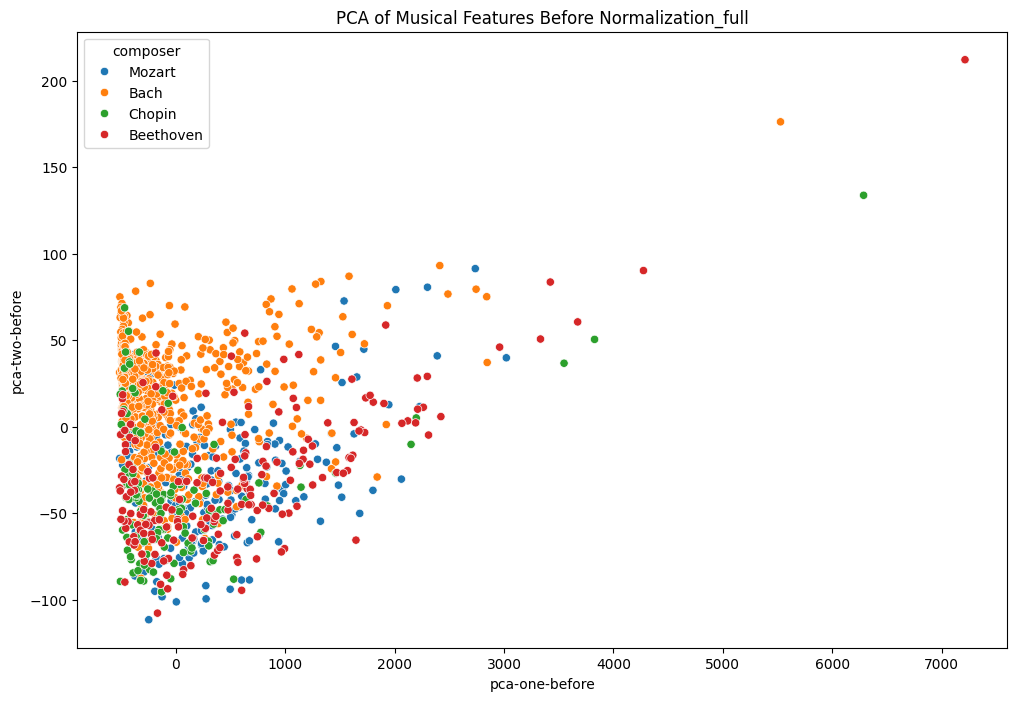

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# addtional featuers; 'num_instruments','tempo','unique_chords','dynamic_range'
# removed 'num_instruments'

# Selected numerical features for normalization
numerical_features = [
    'tempo', 'avg_rhythmic_interval', 'std_dev_rhythmic_interval',
    'unique_chords', 'avg_pitch', 'max_pitch', 'min_pitch', 'avg_velocity',
    'avg_duration', 'std_duration', 'max_polyphony', 'dynamic_range'
]

# First: Visualize the data using PCA before normalization
pca = PCA(n_components=2)
pca_result_before = pca.fit_transform(df_drop[numerical_features].fillna(0))
df_drop['pca-one-before'] = pca_result_before[:, 0]
df_drop['pca-two-before'] = pca_result_before[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca-one-before', y='pca-two-before', hue='composer', data=df_drop)
plt.title('PCA of Musical Features Before Normalization_full')
plt.show()



Now we can move forward with the normalization process.

We will use StandardScaler to normalize the numerical features and then evaluate the PCA again post-normalization.

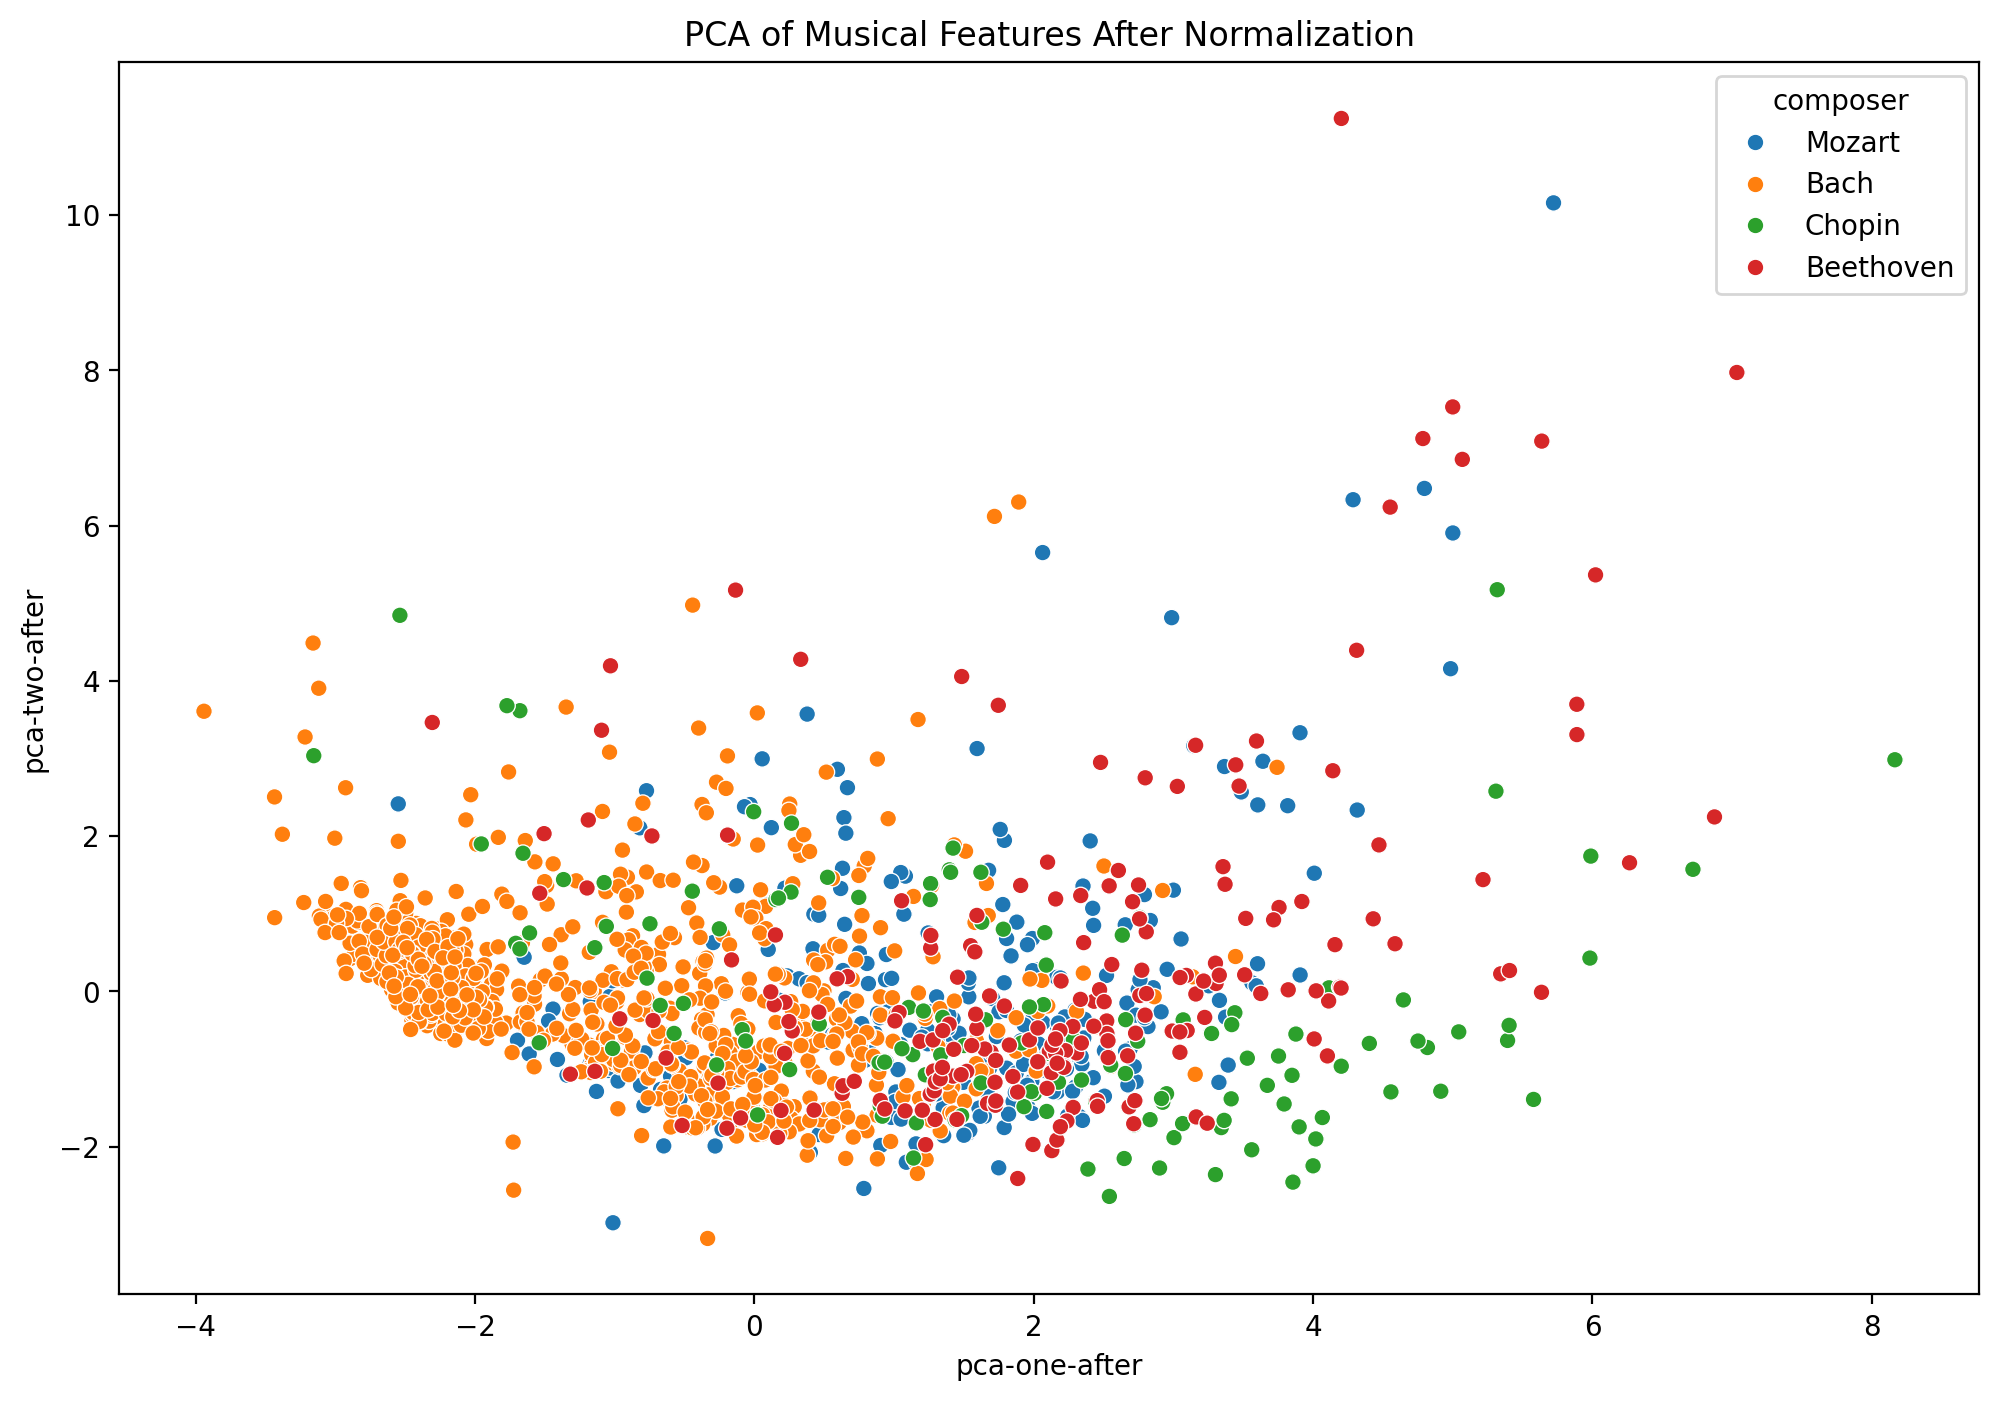

In [ ]:
# Step 2: Normalize the numerical features
scaler = StandardScaler()
df_drop[numerical_features] = scaler.fit_transform(df_drop[numerical_features].fillna(0))

# Step 3: Visualize the data using PCA after normalization
pca_result_after = pca.fit_transform(df_drop[numerical_features])
df_drop['pca-one-after'] = pca_result_after[:, 0]
df_drop['pca-two-after'] = pca_result_after[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca-one-after', y='pca-two-after', hue='composer', data=df_drop)
plt.title('PCA of Musical Features After Normalization')
plt.show()

The PCA plot after normalization shows a more compact and evenly distributed clustering of the data points, which is what we would expect after scaling the features. This normalization has balanced the scales of different features, which is crucial for models our models (LSTM and CNN), where large variances in input data can cause the model to focus too much on features with larger scales.

For the LSTM model, this normalization will help the network learn temporal patterns without being biased by the scale of certain features. For the CNN model, the normalized inputs will ensure that the convolutional filters are applied uniformly across all features, improving pattern recognition.


In [ ]:
#Save the normalized dataset for further modeling
df_drop.to_csv("normalized_midi_features.csv", index=False)


### Exploring Categorical Features

After normalizing the numerical features, the next crucial step is to identify and explore the categorical features in our dataset. These features often hold significant information that can enhance our models' performance, especially when working with deep learning models like LSTMs and CNNs.

### Identifying Categorical Features

We need to identify which features in our dataset are categorical and may benefit from one-hot encoding or other transformations. Categorical features could include data like `composer` (which is the target variable and we wont be normlizing) and `time_signature`.

Let's explore the categorical features in our dataset.


We'll begin by examining these categorical features and then proceed to encode them as needed.


In [ ]:
# Identify categorical features that are strings or objects
categorical_features = []
for column in df_drop.columns:
    # Check if the column data type is object (commonly used for categorical data)
    if df_drop[column].dtype == 'object':
        categorical_features.append(column)

print("Categorical Features Identified (excluding numerical types):\n", categorical_features)

# Let's check the unique values of these categorical features, handling any potential errors exccept for functional_harmony column
categorical_features.remove('functional_harmony')
for feature in categorical_features:
    try:
        print(f"\n Unique values in {feature}:\n", df_drop[feature].unique())
    except TypeError as e:
        print(f"Could not determine unique values for {feature} due to error: {e}")


Categorical Features Identified (excluding numerical types):
 ['filename', 'time_signature', 'chord_frequency_distribution', 'chord_progressions', 'avg_chord_duration', 'chord_complexity', 'pitch_contour', 'functional_harmony', 'composer']

 Unique values in filename:
 ['K361 Serenade n10 3mov.mid' 'K281 Piano Sonata n03 2mov.mid'
 'K136 Divertimento 1mov.mid' ... 'WoO061a Mouvement Pour Piano.mid'
 'WoO060 Mouvement Pour Piano.mid' 'String Quartet n2 op18 n2 2mov.mid']

 Unique values in time_signature:
 ['4/4 at 0.00 seconds' '3/8 at 0.00 seconds' '1/4 at 0.00 seconds'
 '6/8 at 0.00 seconds' '3/4 at 0.00 seconds' '2/4 at 0.00 seconds'
 '2/2 at 0.00 seconds' '4/8 at 0.00 seconds' '8/8 at 0.00 seconds'
 'Unknown' '4/2 at 0.00 seconds' '12/8 at 0.00 seconds'
 '1/8 at 0.00 seconds' '1/2 at 0.00 seconds' '9/8 at 0.00 seconds'
 '1/16 at 0.00 seconds' '9/16 at 0.00 seconds' '3/2 at 0.00 seconds'
 '1/1 at 0.00 seconds' '2/8 at 0.00 seconds' '6/4 at 0.00 seconds'
 '6/16 at 0.00 seconds' '8/4 

Based on this we can see that there are 3 catagorical values that we can attept to encode;

**filename**, **time_signature**, **composer**

The file name dose not inherntly have a lot of menaingful encoded data for its corrisponding MID file.

**time_signature:** The time signature can provide insight into the rhythmic structure of the music, which may differ between composers.

**composer**: This is our target variable, essential for training the model to classify the composer based on musical features


In [ ]:
# Drop filename as it's not useful for model training
df_drop = df_drop.drop(columns=['filename'])


one hot encoding time_signature and composer

In [ ]:
# One-hot encode the time_signature and composer columns
df_drop = pd.get_dummies(df_drop, columns=['time_signature', 'composer'], drop_first=False)

# Let's check the head of the dataframe to ensure the encoding worked
print(df_drop.head())


   num_instruments     tempo  avg_rhythmic_interval  \
0               10 -0.592096               0.058754   
1                1  0.495675              -0.303780   
2               16  1.643786               0.050815   
3                4  1.948214              -0.178137   
4                9 -0.740832              -0.179659   

   std_dev_rhythmic_interval  unique_chords  \
0                  -0.286639       0.460703   
1                  -0.238578       0.258052   
2                  -0.312741       0.362920   
3                   0.009758       2.345507   
4                  -0.233505       0.252383   

                        chord_frequency_distribution  \
0  {'32 44 51 53 56 63': 0.0007132667617689016, '...   
1  {'55 63 79': 0.000419639110365086, '62 77': 0....   
2  {'33 45 57 78 81': 0.001312910284463895, '43 5...   
3  {'64 75 80 83': 0.00022398924851607123, '60 64...   
4  {'62 77': 0.0005398110661268556, '42 54 66': 0...   

                                  chord_progressi

It looks like the one-hot encoding has resulted in a large number of columns, especially due to the way our time_signature feature was handled. This might be because the time_signature values were treated as strings, leading to the creation of many redundant columns.
The composer has been encoded as expected

Next we'll refine Time Signature Encoding, Ensure that time_signature is only encoded once per unique value **dropping any redundant columns that may have been created accidentally.**

In [ ]:
# Drop redundant columns in time_signature
df_drop = df_drop.loc[:, ~df_drop.columns.duplicated()]

# Check the number of columns after removing duplicates
print(f"Number of columns after cleaning: {df_drop.shape[1]}")

# Ensure time_signature is correctly one-hot encoded
if 'time_signature' in df_drop.columns:
    df_drop = pd.get_dummies(df_drop, columns=['time_signature'], drop_first=True)

# Final check of DataFrame
print(df_drop.head())


Number of columns after cleaning: 55
   num_instruments     tempo  avg_rhythmic_interval  \
0               10 -0.592096               0.058754   
1                1  0.495675              -0.303780   
2               16  1.643786               0.050815   
3                4  1.948214              -0.178137   
4                9 -0.740832              -0.179659   

   std_dev_rhythmic_interval  unique_chords  \
0                  -0.286639       0.460703   
1                  -0.238578       0.258052   
2                  -0.312741       0.362920   
3                   0.009758       2.345507   
4                  -0.233505       0.252383   

                        chord_frequency_distribution  \
0  {'32 44 51 53 56 63': 0.0007132667617689016, '...   
1  {'55 63 79': 0.000419639110365086, '62 77': 0....   
2  {'33 45 57 78 81': 0.001312910284463895, '43 5...   
3  {'64 75 80 83': 0.00022398924851607123, '60 64...   
4  {'62 77': 0.0005398110661268556, '42 54 66': 0...   

            

In [ ]:
# Display all the columns in the DataFrame after one-hot encoding
print(df_drop.columns)

Index(['num_instruments', 'tempo', 'avg_rhythmic_interval',
       'std_dev_rhythmic_interval', 'unique_chords',
       'chord_frequency_distribution', 'chord_progressions',
       'avg_chord_duration', 'chord_complexity', 'avg_pitch', 'max_pitch',
       'min_pitch', 'avg_velocity', 'avg_duration', 'std_duration',
       'max_polyphony', 'dynamic_range', 'pitch_contour', 'functional_harmony',
       'Acoustic Grand Piano_count', 'pca-one-before', 'pca-two-before',
       'pca-one-after', 'pca-two-after', 'time_signature_1/1 at 0.00 seconds',
       'time_signature_1/16 at 0.00 seconds',
       'time_signature_1/2 at 0.00 seconds',
       'time_signature_1/4 at 0.00 seconds',
       'time_signature_1/8 at 0.00 seconds',
       'time_signature_12/16 at 0.00 seconds',
       'time_signature_12/8 at 0.00 seconds',
       'time_signature_2/2 at 0.00 seconds',
       'time_signature_2/4 at 0.00 seconds',
       'time_signature_2/8 at 0.00 seconds',
       'time_signature_3/16 at 0.00 second

Clean up remaining time_signature by grouping time steps (denominators)

In [ ]:
# Group time signatures with similar denominators or common use
df_drop['time_signature_4/4_grouped'] = df_drop[
    ['time_signature_4/4 at 0.00 seconds',
     'time_signature_2/4 at 0.00 seconds',
     'time_signature_4/8 at 0.00 seconds',
     'time_signature_4/2 at 0.00 seconds']
].sum(axis=1)

df_drop['time_signature_3/4_grouped'] = df_drop[
    ['time_signature_3/4 at 0.00 seconds',
     'time_signature_6/8 at 0.00 seconds',
     'time_signature_3/8 at 0.00 seconds',
     'time_signature_6/4 at 0.00 seconds']
].sum(axis=1)

df_drop['time_signature_odd_grouped'] = df_drop[
    ['time_signature_1/4 at 0.00 seconds',
     'time_signature_3/2 at 0.00 seconds',
     'time_signature_9/8 at 0.00 seconds',
     'time_signature_9/16 at 0.00 seconds',
     'time_signature_3/16 at 0.00 seconds']
].sum(axis=1)



In [ ]:
# Now we canDrop the original one-hot encoded columns
df_drop.drop(columns=[
    'time_signature_4/4 at 0.00 seconds',
    'time_signature_2/4 at 0.00 seconds',
    'time_signature_4/8 at 0.00 seconds',
    'time_signature_4/2 at 0.00 seconds',
    'time_signature_3/4 at 0.00 seconds',
    'time_signature_6/8 at 0.00 seconds',
    'time_signature_3/8 at 0.00 seconds',
    'time_signature_6/4 at 0.00 seconds',
    'time_signature_1/4 at 0.00 seconds',
    'time_signature_3/2 at 0.00 seconds',
    'time_signature_9/8 at 0.00 seconds',
    'time_signature_9/16 at 0.00 seconds',
    'time_signature_3/16 at 0.00 seconds',
    'time_signature_Unknown',
    'time_signature_12/8 at 0.00 seconds',
    'time_signature_1/8 at 0.00 seconds',
    'time_signature_1/2 at 0.00 seconds',
    'time_signature_1/1 at 0.00 seconds',
    'time_signature_2/8 at 0.00 seconds',
    'time_signature_6/16 at 0.00 seconds',
    'time_signature_8/4 at 0.00 seconds',
    'time_signature_12/16 at 0.00 seconds',
    'time_signature_6/8 at 0.09 seconds',
    'time_signature_3/4 at 381.71 seconds'
], inplace=True)

# Validate the changes
print(df_drop.head())
print("Columns after grouping and dropping:")
print(df_drop.columns)


   num_instruments     tempo  avg_rhythmic_interval  \
0               10 -0.592096               0.058754   
1                1  0.495675              -0.303780   
2               16  1.643786               0.050815   
3                4  1.948214              -0.178137   
4                9 -0.740832              -0.179659   

   std_dev_rhythmic_interval  unique_chords  \
0                  -0.286639       0.460703   
1                  -0.238578       0.258052   
2                  -0.312741       0.362920   
3                   0.009758       2.345507   
4                  -0.233505       0.252383   

                        chord_frequency_distribution  \
0  {'32 44 51 53 56 63': 0.0007132667617689016, '...   
1  {'55 63 79': 0.000419639110365086, '62 77': 0....   
2  {'33 45 57 78 81': 0.001312910284463895, '43 5...   
3  {'64 75 80 83': 0.00022398924851607123, '60 64...   
4  {'62 77': 0.0005398110661268556, '42 54 66': 0...   

                                  chord_progressi

In [ ]:
# save the cleaned dataset for further modeling
df_drop.to_csv("cleaned_midi_features_subset.csv", index=False)

## Data Preprocessing Summary
Throughout the data preprocessing phase, we have meticulously prepared our dataset for subsequent exploratory data analysis (EDA) and model training. Here's a recap of what we've accomplished:

**Full Feature Set**

We started with an extensive set of features including both numerical and categorical data:
`['filename', 'num_instruments', 'tempo', 'time_signature', 'avg_rhythmic_interval', 'std_dev_rhythmic_interval', 'unique_chords', 'chord_frequency_distribution', 'chord_progressions', 'avg_chord_duration', 'chord_complexity', 'avg_pitch', 'max_pitch', 'min_pitch', 'avg_velocity', 'avg_duration', 'std_duration', 'max_polyphony', 'dynamic_range', 'pitch_contour', 'functional_harmony', 'composer', 'Acoustic Grand Piano_count']`

**Normalization of Numerical Features**

Then we normalized the following numerical features to ensure they are on a similar scale, which is crucial for the performance of many machine learning algorithms:

`['tempo', 'avg_rhythmic_interval', 'std_dev_rhythmic_interval', 'unique_chords', 'avg_pitch', 'max_pitch', 'min_pitch', 'avg_velocity', 'avg_duration', 'std_duration', 'max_polyphony', 'dynamic_range']`

**Categorical Feature Encoding**

We encoded categorical features that are straightforward to hash, such as;
`'time_signature' and 'composer'`, using one-hot encoding.

 This transformation is essential for handling categorical data in machine learning models.


**Handling Complex Categorical Features**

Some categorical features such as 'chord_frequency_distribution', 'chord_progressions', 'avg_chord_duration', 'chord_complexity', 'pitch_contour', and 'functional_harmony' could not be encoded directly due to their complex data structures (e.g., lists, dictionaries).

 These features represent advanced musical aspects and may require specialized processing or feature engineering approaches, which could be considered for future enhancements to improve model performance.




### **Final Feature Set for EDA**

Post-encoding and cleaning, our dataset comprises the following features, which will be used in the EDA:

`['tempo', 'avg_rhythmic_interval', 'std_dev_rhythmic_interval', 'unique_chords', 'avg_pitch', 'max_pitch', 'min_pitch', 'avg_velocity', 'avg_duration', 'std_duration', 'max_polyphony', 'dynamic_range', 'composer_Beethoven', 'composer_Chopin', 'composer_Mozart','composer_Bach', 'time_signature_4/4_grouped', 'time_signature_3/4_grouped', 'time_signature_odd_grouped']`


### Final DataFrame
We'll create the final DataFrame with the selected features, ensuring it is ready for the EDA

In [ ]:
# Final DataFrame
final_features = [
     'tempo', 'avg_rhythmic_interval', 'std_dev_rhythmic_interval',
    'unique_chords', 'avg_pitch', 'max_pitch', 'min_pitch', 'avg_velocity',
    'avg_duration', 'std_duration', 'max_polyphony', 'dynamic_range',
    'composer_Beethoven', 'composer_Chopin', 'composer_Mozart','composer_Bach',
    'time_signature_4/4_grouped', 'time_signature_3/4_grouped', 'time_signature_odd_grouped'
]

df_final = df_drop[final_features]

## Final Data Preparation and EDA Explanation

Now that we have completed the data preprocessing steps, our next task is to explore the data through Exploratory Data Analysis. This will help us understand the distribution of our numerical features, investigate relationships between them, and uncover any patterns or outliers. This understanding will be crucial for fine-tuning our models later on.



### Exploratory Data Analysis Options

1. **Histograms of Numerical Features**: We will plot histograms to visualize the distribution of our numerical features. This helps us understand the central tendency, dispersion, and shape of the data distribution.

2. **Box Plots for Numerical Features**: Box plots allow us to identify outliers and understand the spread and skewness of the numerical data. This is important for detecting potential issues in the data that could affect model performance.

3. **Correlation Matrix**: By plotting a heatmap of the correlation matrix, we can observe the relationships between numerical features. Highly correlated features might indicate redundancy, while low correlations might highlight unique contributions to the model.

4. **Pair Plots**: Pair plots give a comprehensive view of how each feature relates to the others. They allow us to see the interactions between different features and their combined effect on the data.

5. **t-SNE Visualization**: t-SNE is another dimensionality reduction technique, particularly useful for visualizing high-dimensional data. It emphasizes retaining the local structure of the data, making it ideal for clustering tasks.

6. **Composer Distribution**: Finally, we will plot the distribution of the number of samples per composer to ensure our dataset is balanced and representative.

Let's move on to the EDA with these visualizations.


In [ ]:
# Plot histograms for numerical features
numerical_features = [
    'tempo', 'avg_rhythmic_interval', 'std_dev_rhythmic_interval',
    'unique_chords', 'avg_pitch', 'max_pitch', 'min_pitch', 'avg_velocity',
    'avg_duration', 'std_duration', 'max_polyphony', 'dynamic_range'
]

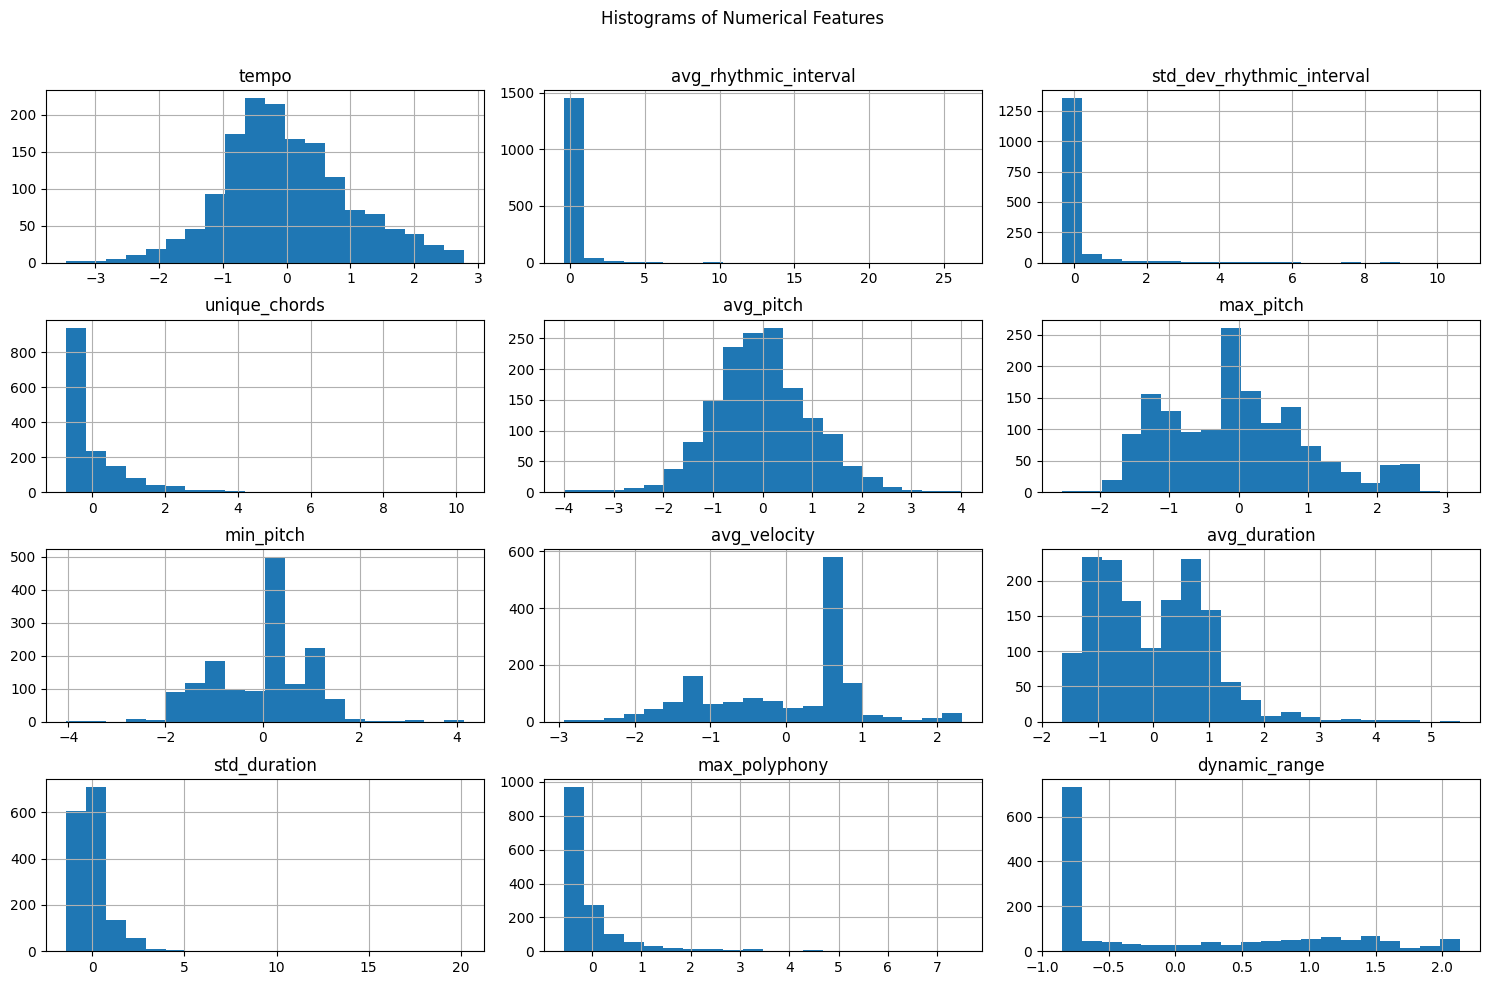

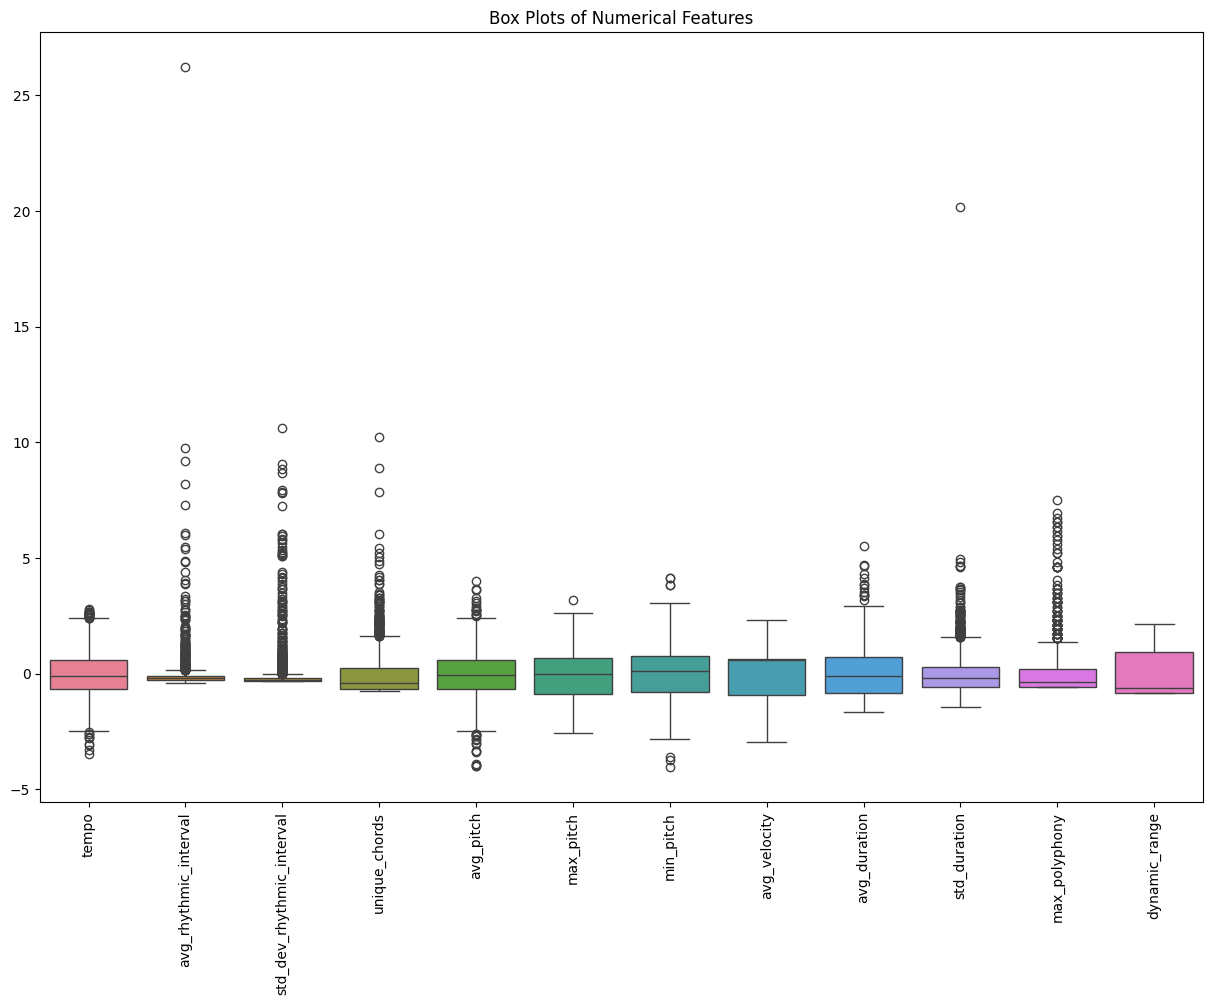

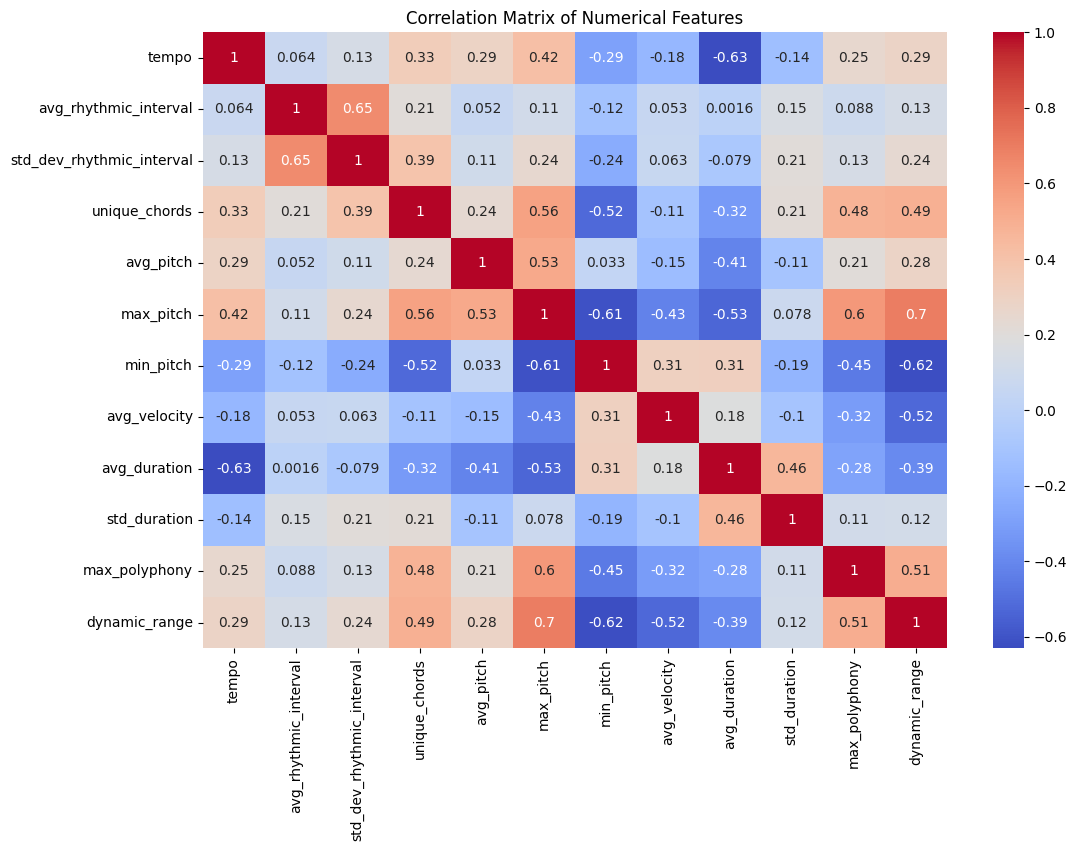

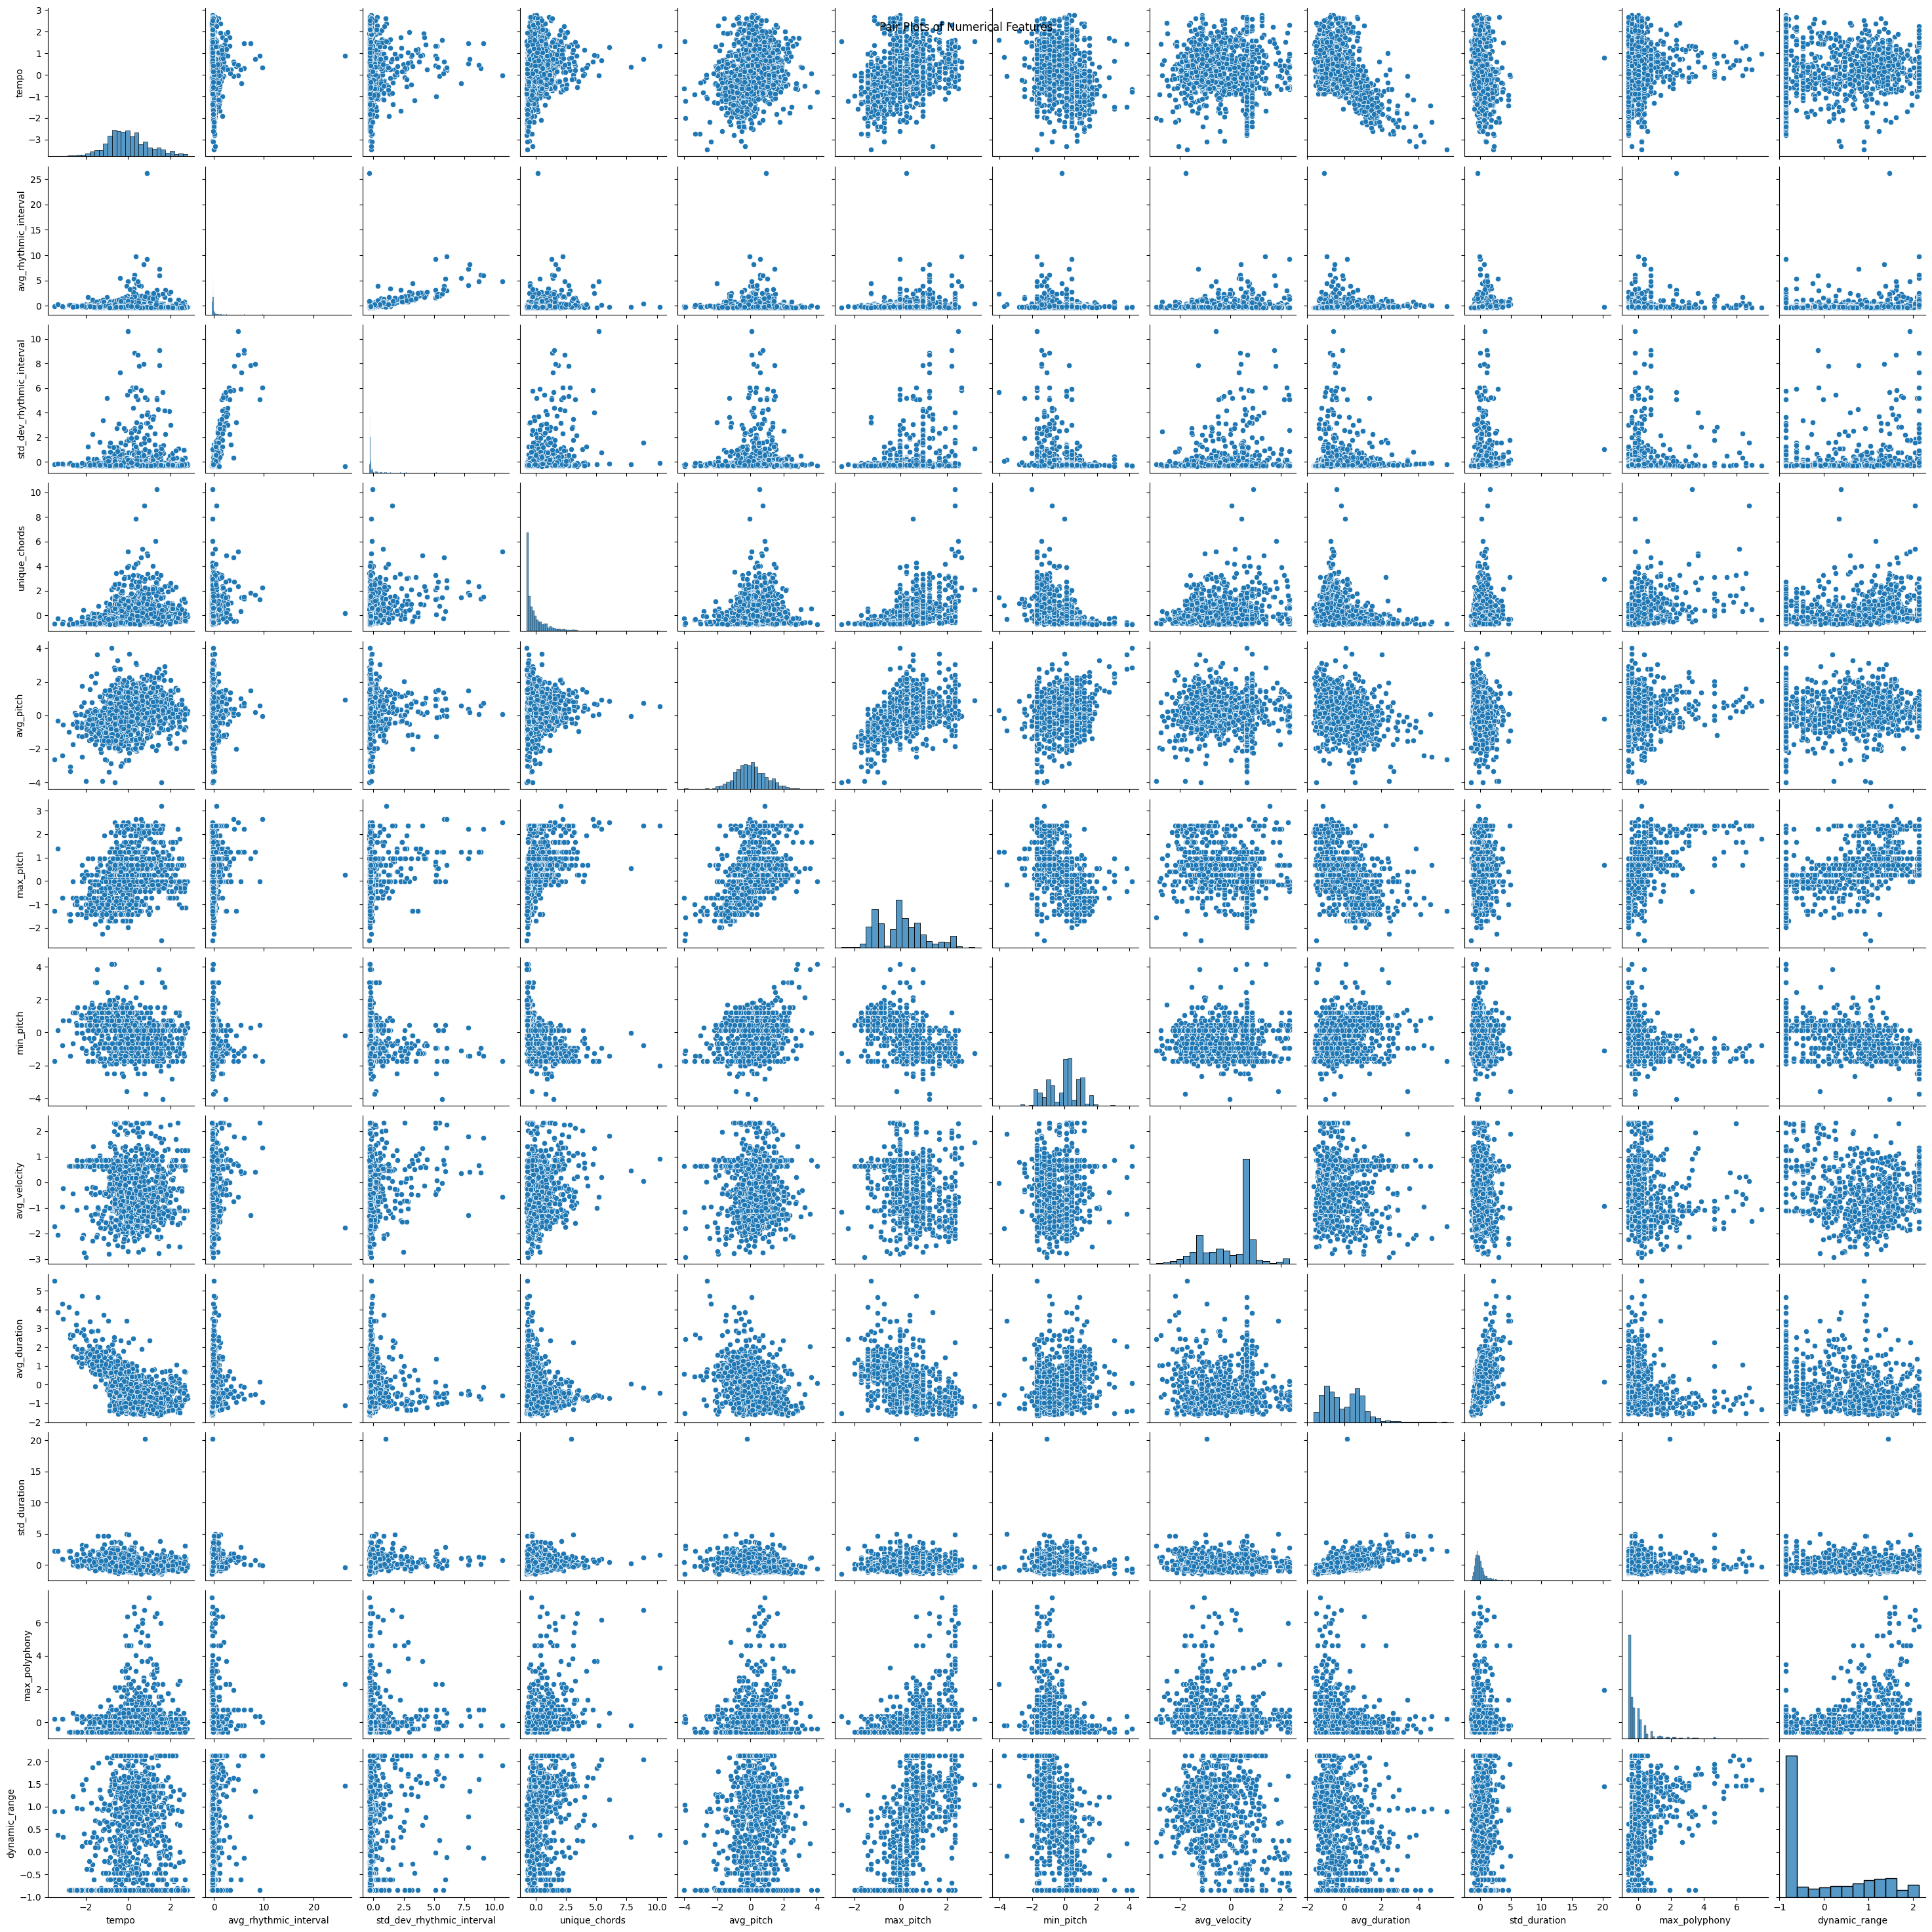

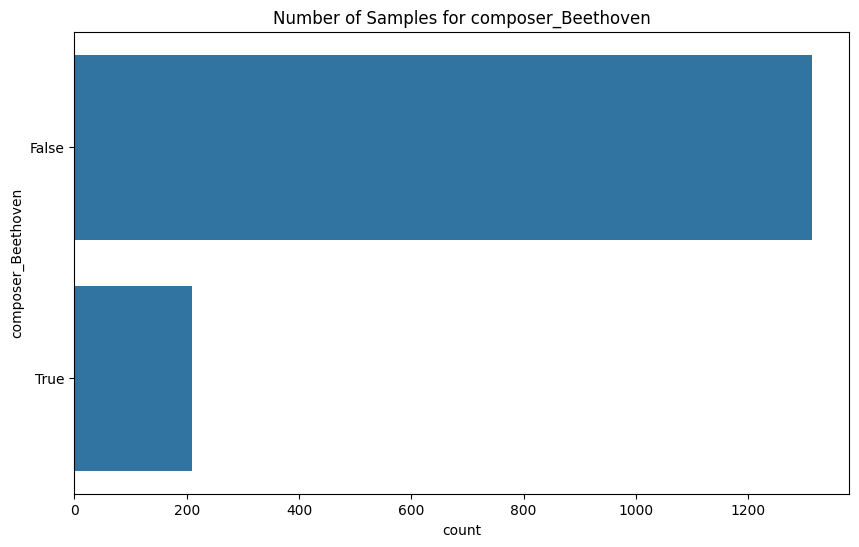

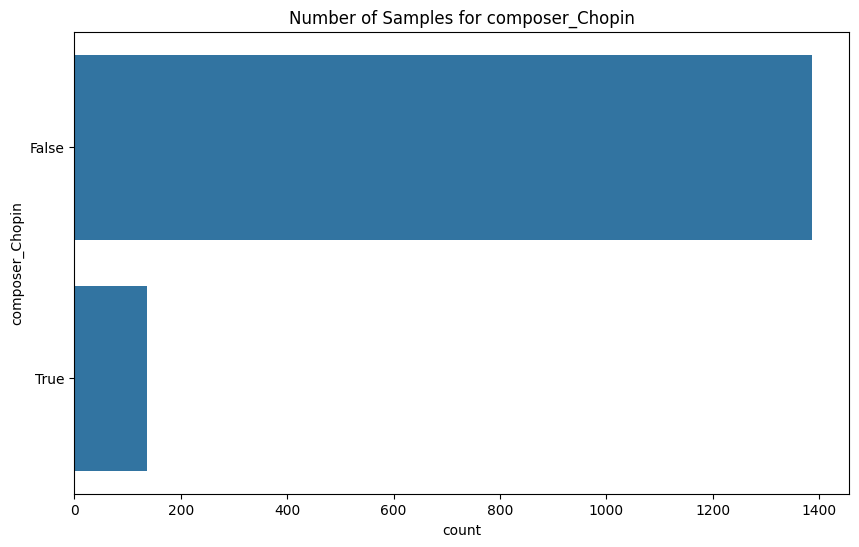

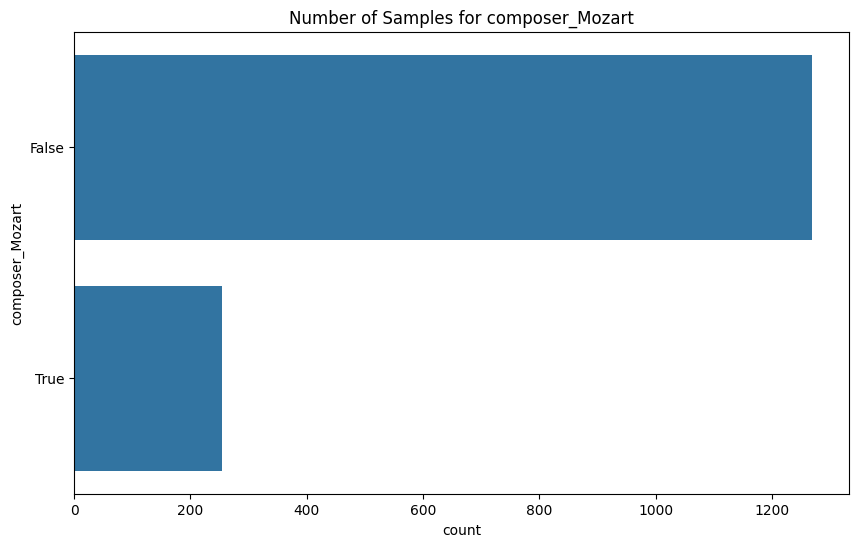

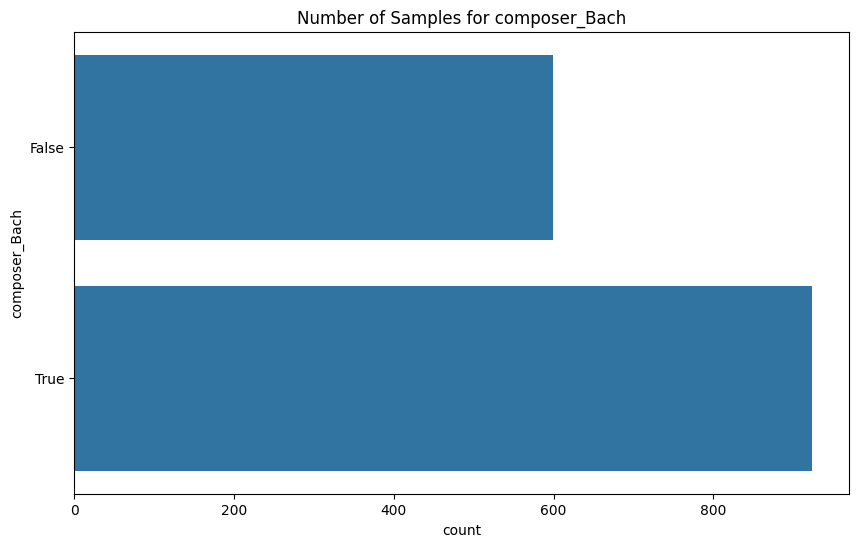

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Plot histograms for numerical features
df_drop[numerical_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Histograms of Numerical Features \n')
plt.show()

# 2. Plot box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_drop[numerical_features])
plt.xticks(rotation=90)
plt.title('Box Plots of Numerical Features')
plt.show()

# 3. Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df_drop[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 4. Pair plots for numerical features
sns.pairplot(df_drop[numerical_features])
plt.suptitle('Pair Plots of Numerical Features')
plt.show()

# 5. Plot the distribution of the number of samples per composer
composer_features = ['composer_Beethoven', 'composer_Chopin', 'composer_Mozart', 'composer_Bach']

for composer_feature in composer_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=composer_feature, data=df_drop)
    plt.title(f'Number of Samples for {composer_feature}')
    plt.show()


### Evaluation of EDA Results

1. **Histograms for Numerical Features**:
   - **Tempo**: Appears to be normally distributed, which is expected as it represents a tempo range common in classical music.
   - **Avg Rhythmic Interval & Std Dev Rhythmic Interval**: These features show us a right-skewed distribution, indicating that most pieces have smaller rhythmic intervals with a few outliers having larger intervals.
   - **Unique Chords**: Also shows a right-skewed distribution, suggesting that most compositions use a limited set of unique chords.
   - **Pitch-related Features (Avg, Max, Min Pitch)**: These are mostly normally distributed, with some skewness in the min_pitch, indicating outliers in the lower pitch range.
   - **Avg Velocity**: Has a prominent peak around the mean value, with some skewness, which could represent a common playing dynamic.
   - **Duration Features (Avg, Std Duration)**: These features also show a skewed distribution, which is typical as many pieces might have consistent note durations with few outliers.
   - **Max Polyphony & Dynamic Range**: Both show skewness, indicating that most compositions have low polyphony and dynamic range, with some pieces being more complex or varied.

2. **Box Plots for Numerical Features**:
   - The box plots reveal the presence of numerous outliers in many features, particularly in rhythmic intervals, unique chords, and pitch-related features. This suggests significant variability across the dataset, which could be critical in distinguishing between composers.
   - Features like tempo and pitch show a relatively tighter interquartile range, indicating more consistency across compositions.

3. **Correlation Matrix**:
   - **High Correlations**:
     - **Max Pitch & Dynamic Range**: Strong positive correlation suggests that compositions with higher maximum pitch also exhibit greater dynamic range.
     - **Max Pitch & Unique Chords**: This suggests that more complex compositions with a higher variety of chords tend to use a broader pitch range.
     - **Avg & Max Pitch**: This is expected as higher average pitch compositions are likely to have higher maximum pitch as well.
   - **Negative Correlations**:
     - **Min Pitch & Max Pitch**: As expected, these have a negative correlation, where a composition with a lower minimum pitch will generally have a lower maximum pitch.
     - **Avg Duration & Tempo**: Suggests that faster tempos are associated with shorter average note durations.

4. **Pair Plots for Numerical Features**:
   - The pair plots help visualize the relationships between features. For example:
     - There is a clear linear relationship between avg_pitch and max_pitch, as expected.
     - The scatter plots also highlight the variability and outliers within the dataset, which can be crucial for model performance.

5. **Count Plots for Categorical Features**:
   - **The Composer target feature**: The count plots show a significant imbalance in the dataset with Bach having the most samples, followed by Mozart, Beethoven, and Chopin. This imbalance needs to be addressed in model training, perhaps through techniques like oversampling, undersampling, or using class weights.

### Next Steps:
Out of all the data data evaluted the one the seems concerning the most is the data sample imbalance so we'll address that next.



### Continuing the Project After EDA: Addressing Class Imbalance

After completing the Exploratory Data Analysis (EDA), we noticed a significant class imbalance in our dataset, particularly with the Bach composer class dominating the data. To address this issue before moving on to model training, we will:

1. **Undersample the Majority Class (Bach)**:
   We'll reduce the number of samples for the Bach class slightly to make the dataset more balanced. This helps to ensure that the model does not become biased toward the majority class.

2. **Use Class Weighting During Training**:
   During the training phase, we'll apply class weighting to further mitigate the impact of any remaining imbalance. This step is crucial as it will instruct the model to treat all classes with appropriate importance, preventing it from favoring the more frequent classes.

3. **SMOTE**:
depeding on our results we'll also explore smote as an option to itterate on our performance


### Undersample the Majority Class (Bach)

**Explanation:**
Undersampling involves randomly reducing the number of instances in the majority class to better match the number of instances in the minority classes. We will slightly reduce the number of samples for the Bach class while ensuring we retain a significant amount of data for training.


In [ ]:
# Undersample Bach

# Separate the dataset into the majority and minority classes
df_bach = df_drop[df_drop['composer_Bach'] == True]
df_others = df_drop[df_drop['composer_Bach'] == False]

# Set the number of samples for the Bach class (undersampling)
bach_sample_count = 500  # adjustabe but we'll go with 500 for now since we have almost 900 postive response and teh avrage for the others is 200

# Randomly sample from the Bach class
df_bach_undersampled = df_bach.sample(n=bach_sample_count, random_state=42)

# Combine the undersampled Bach class with the other classes
df_resampled = pd.concat([df_bach_undersampled, df_others])

# Shuffle the dataset to mix the classes well
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the distribution of the classes after resampling
print("Class distribution after undersampling:")
print(df_resampled[['composer_Bach', 'composer_Mozart', 'composer_Beethoven', 'composer_Chopin']].sum())

# Check the shape of the resampled dataset
print("Shape of resampled dataset:", df_resampled.shape)


Class distribution after undersampling:
composer_Bach         500
composer_Mozart       254
composer_Beethoven    209
composer_Chopin       136
dtype: int64
Shape of resampled dataset: (1099, 34)


Based on the resutsls, the class distribution looks a little more balanced now after our undersampling, and the dataset still contains a sufficient number of samples for training.

## Finalizing the Feature Set and Splitting the Data

We'll finalize the set of features that will be used for training the models. This includes both numerical and categorical features. Once the feature set is confirmed, we'll split the dataset into training and testing sets to evaluate model performance.

In [ ]:
# save the cleaned dataset for further modeling
df_final.to_csv("final_midi_features_subset.csv", index=False)

In [ ]:
print(df_final.columns)

Index(['num_instruments', 'tempo', 'avg_rhythmic_interval',
       'std_dev_rhythmic_interval', 'unique_chords', 'avg_pitch', 'max_pitch',
       'min_pitch', 'avg_velocity', 'avg_duration', 'std_duration',
       'max_polyphony', 'dynamic_range', 'composer_Beethoven',
       'composer_Chopin', 'composer_Mozart', 'composer_Bach',
       'time_signature_4/4_grouped', 'time_signature_3/4_grouped',
       'time_signature_odd_grouped'],
      dtype='object')


Now we'll idetify our target tables for out features and split our data into features and targets


In [ ]:
# Target labels for classification (composer classes)
target_labels = ['composer_Bach', 'composer_Mozart', 'composer_Beethoven', 'composer_Chopin']

# Splitting the data into features and target labels
X = df_resampled[final_features]
y = df_resampled[target_labels]

Then we can split our data into Train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (879, 20)
Shape of X_test: (220, 20)
Shape of y_train: (879, 4)
Shape of y_test: (220, 4)


 The data has been successfully split into training and testing sets with the expected shapes. We now have 879 samples for training and 220 samples for testing, which is a good base for building and evaluating our models.

## Training our Models

#### Lets start by continuing to addres the imbalnce identfeid earler, we can add weights to our training models to help futher account for the imbalnce.

- We will implement class weighting during model training. **Class weighting will help the model by assigning a higher penalty for misclassifying the minority classes, thus making the model more sensitive to those classes**.

- We'll calculate the class weights based on the distribution of classes in the training data. These weights will be used during the training of both the LSTM and CNN models to balance the influence of each class.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights based on y_train distribution
class_weights = {}
for i, label in enumerate(target_labels):
    class_weights[i] = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train[label]),
        y=y_train[label]
    )[1]  # We take the weight for the positive class (True)

# Print the calculated class weights
print("Calculated class weights:", class_weights)


Calculated class weights: {0: 1.115482233502538, 1: 2.092857142857143, 2: 2.540462427745665, 3: 4.3088235294117645}


Based on the resutls we can see that the weights have been distributed accross our target features

Class 0 (Bach): Weight = 1.115

Class 1 (Mozart): Weight = 2.093

Class 2 (Beethoven): Weight = 2.540

Class 3 (Chopin): Weight = 4.309

The disparty in these weights directly reflect the relative imbalance of data in the target features, with higher weights assigned to the less frequent classes (Chopin and Beethoven) to ensure the model pays more attention to them during training.

## Model 1
## Building our LSTM Model

We will now proceed to build our LSTM model first. It will leverage the temporal aspects of the data. We'll use the calculated class weights during the model training process to address the class imbalance.

We'll follow these steps to build and train the LSTM model:

- a) Model Architecture: We'll define a sequential model with LSTM layers, followed by dense layers**.Since we’re working with features from MIDI data, which aren't inherently sequential (like time series), we’ll add an extra dimension to our input data to allow it to work with the LSTM architecture.**

- b) Compilation: We'll compile the model using an appropriate optimizer, loss function (categorical cross-entropy), and the class weights.

- c) Training: We'll train the model using the training data, applying the class weights to balance the influence of each class.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Define the modified LSTM model
model = Sequential()

# LSTM layer with higher dropout and L2 regularization
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Increased dropout rate

model.add(LSTM(64, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Increased dropout rate

# Output layer
model.add(Dense(4, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping and class weights
history = model.fit(X_train_reshaped, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_reshaped, y_test),
                    class_weight=class_weights,
                    callbacks=[early_stopping])


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3402 - loss: 4.5607 - val_accuracy: 0.6182 - val_loss: 2.4346
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6153 - loss: 3.6293 - val_accuracy: 0.6818 - val_loss: 1.8283
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7175 - loss: 2.8382 - val_accuracy: 0.7364 - val_loss: 1.4159
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7749 - loss: 2.3511 - val_accuracy: 0.7545 - val_loss: 1.1657
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8089 - loss: 1.9683 - val_accuracy: 0.8136 - val_loss: 1.0546
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8818 - loss: 1.6604 - val_accuracy: 0.8364 - val_loss: 0.9741
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9104 - loss: 1.4254 - val_accuracy: 0.8909 - val_loss: 0.8879
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9571 - loss: 1.2423 - val_accuracy: 0.9455 - val_loss

### Detailed Explanation of the LSTM Model

 The architecture and details of the LSTM model are as follows:

#### 1. **Input Layer**:
   - The input to our model consists of the preprocessed and normalized musical features.
   - In this case, the input shape to the LSTM layer is `(number_of_samples, time_steps, number_of_features)`. Since we are working with features extracted from entire compositions rather than sequential time steps within a composition, we reshape the input to be `(number_of_samples, 1, number_of_features)`, treating the entire feature set as a single time step.

#### 2. **LSTM Layer**:
   - **LSTM(128, return_sequences=True)**: The LSTM layer contains 128 units (or memory cells) and `return_sequences=True` is set, which means that the LSTM layer returns the full sequence of outputs for each input sequence. This allows the next LSTM layer to process each output from this layer.
   - The LSTM layer is designed to capture temporal dependencies and patterns in the data, which is particularly useful for sequence data or time-series data.

#### 3. **Dropout Layer**:
   - **Dropout(0.2)**: The dropout layer randomly sets 20% of the input units to zero during each forward pass. This helps prevent overfitting by ensuring that the model doesn't rely too heavily on any one part of the input data.

#### 4. **Dense Layers**:
   - **Dense(64, activation='relu')**: After the LSTM layer, we pass the output to a dense (fully connected) layer with 64 units and ReLU activation. This layer learns a non-linear combination of the features extracted by the LSTM.
   - **Dense(32, activation='relu')**: A second dense layer with 32 units and ReLU activation further refines the learned features, potentially capturing more complex patterns.

#### 5. **Output Layer**:
   - **Dense(number_of_classes, activation='softmax')**: The final layer is a dense layer with a number of units equal to the number of composer classes (in this case, 4: Bach, Beethoven, Chopin, Mozart). The softmax activation function is used to output a probability distribution across the classes, indicating the model's confidence in each class.

#### 6. **Compilation**:
   - The model is compiled using the Adam optimizer, which is widely used for training deep learning models due to its adaptive learning rate capabilities.
   - The loss function used is `categorical_crossentropy`, which is suitable for multi-class classification tasks.
   - Accuracy is used as the evaluation metric during training and validation.

### Model Training Process:
- **Class Weights**: To address class imbalance, class weights are computed and applied during training, ensuring that the model doesn't become biased towards the majority class.
- **Epochs and Batch Size**: The model is trained over multiple epochs (in this case, 50), with a batch size of 32 samples. This means the model updates its weights after every 32 samples during training.




In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
y_pred = model.predict(X_test_reshaped)

# Since the output is in probability form, we'll take the class with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Bach', 'Mozart', 'Beethoven', 'Chopin'])

print("Classification Report:\n")
print(report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:

              precision    recall  f1-score   support

        Bach       1.00      1.00      1.00       106
      Mozart       1.00      1.00      1.00        44
   Beethoven       1.00      1.00      1.00        36
      Chopin       1.00      1.00      1.00        34

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [ ]:
import numpy as np

# Convert y_test to a NumPy array if it's not already one
y_test_array = y_test.to_numpy()

# Select 5 random samples from the test set
random_indices = np.random.choice(X_test_reshaped.shape[0], 5, replace=False)
random_test_samples = X_test_reshaped[random_indices]
actual_labels = np.argmax(y_test_array[random_indices], axis=1)

# Predict the composers for the selected samples
predictions = model.predict(random_test_samples)
predicted_labels = np.argmax(predictions, axis=1)

# Map the numeric labels back to composer names
composer_map = {0: 'Bach', 1: 'Beethoven', 2: 'Chopin', 3: 'Mozart'}
actual_composers = [composer_map[label] for label in actual_labels]
predicted_composers = [composer_map[label] for label in predicted_labels]

# Display the results
for i in range(5):
    print(f"Sample {i + 1}:")
    print(f"Actual Composer: {actual_composers[i]}")
    print(f"Predicted Composer: {predicted_composers[i]}")
    print("-" * 30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sample 1:
Actual Composer: Bach
Predicted Composer: Bach
------------------------------
Sample 2:
Actual Composer: Chopin
Predicted Composer: Chopin
------------------------------
Sample 3:
Actual Composer: Mozart
Predicted Composer: Mozart
------------------------------
Sample 4:
Actual Composer: Bach
Predicted Composer: Bach
------------------------------
Sample 5:
Actual Composer: Mozart
Predicted Composer: Mozart
------------------------------


### Performance Evaluation of LSTM Model Run and test cases

#### Observations:
1. **Accuracy**:
   - The model achieves 100% accuracy on both the training and validation datasets, indicating that it has perfectly fit the provided data. However, this could be a sign of overfitting.

2. **Loss**:
   - The training loss decreases steadily from 4.5607 to 0.2721 over the course of 50 epochs. Similarly, the validation loss decreases from 2.4346 to 0.2286. The consistent decrease in loss without significant divergence between training and validation suggests that the model is learning effectively from the training data.

3. **Highly suggests potential overfitting**:
   - While the loss seems promissing and the model shows very high accuracy, this might not necessarily translate to good generalization on unseen data. The model could be overfitting, memorizing the training data rather than learning generalizable patterns.

#### Future evaluation enhancements :
1. **Evaluate on Unseen Data**: To confirm whether the model has overfitted, it should be tested on a completely unseen test dataset. High performance on the test set would indicate that the model has generalized well; otherwise, it confirms overfitting.
  
2. **Data Augmentation**: To further combat overfitting, we could consider  data augmentation techniques to employ more variability in the training data.



### Next Steps:
We'll evaluate how our lstm model compare with other archtecture. Now we'll move on to training our CNN model

CNN Model: Porovided 2 options

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)))
model.add(layers.MaxPooling1D(pool_size=2))

# Convolutional Layer 2
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Convolutional Layer 3
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Fully Connected Layer 1
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # dropout to prevent overfitting

# Fully Connected Layer 2
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(4, activation='softmax'))  #  4 classes (Bach, Beethoven, Chopin, Mozart)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


The model above encorprates basic CNN architecture with multiple convolutional layers increasing in filter size, followed by max-pooling, flattening, and fully connected layers.

In [ ]:
model = Sequential()

# 1D Convolutional Layer with L2 regularization and dropout
model.add(Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(sequence_length, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Increased dropout rate

# Another 1D Convolutional Layer with L2 regularization and dropout
model.add(Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Increased dropout rate

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully Connected Layer with L2 regularization and dropout
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Increased dropout rate

# Output layer with softmax activation
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes for classification


I designed the second model considering the overfitting concerns. By incorporating L2 regularization and a higher drop out rate our CNN model can mitigate these concerns and allign structurely with the LSTM Model. The CNN model is designed to capture spatial patterns within the input sequences, similar to how the LSTM model captures temporal dependencies. This model is well-suited for classifying time-series-like data where patterns across time or sequences are important.